# Problem Statement

Understanding the problem statement is the first and foremost step. This helps us give an intuition of what we will face ahead. Let us see the problem statement: 

At Santander ,mission is to help people and businesses prosper. We are always looking for ways to help our customers understand
their financial health and identify which products and services might help them achieve their monetary goals.In this challenge,
we need to identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted.

## Data Dictionary

**Features**

**Independent Features:**

|Feature|Feature Type|Description|
|-----|-----|-----|
|ID_code|String|ID code of a customer|
|var_0|Numerical|Value of some feature|
|var_1|Numerical|Value of some feature|
|var_2|Numerical|Value of some feature|
|...|...|...|
|...|...|...|
|var_198|Numerical|Value of some feature|
|var_199|Numerical|Value of some feature|

**Dependent Feature:**

|Feature|Feature Type|Description|
|-----|-----|-----|
|target|Categorical|Indicates whether the customer made the purchase or not|

In [1]:
#Let's import the required libraries.
import os
import numpy as np                                                                # For mathematical calculations
import pandas as pd                                                               # For working with Dataframes
import matplotlib.pyplot as plt                                                   # For Data Visualization
%matplotlib inline
import seaborn as sns                                                             # For Data Visualization
sns.set()
import warnings                                                                   # For ignoring warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler                                    # For scaling the features
from sklearn.linear_model import LogisticRegression                               # For Logistic Regression implementation
from sklearn.tree import DecisionTreeClassifier                                   # For Decision Tree implementation
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier   # For Random Forest and Gradient Boosting implementation
from xgboost import XGBClassifier                                                 # For XGBoost implementation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV              # For searching the optimal hyperparameters
from sklearn.metrics import roc_auc_score, mean_squared_error, accuracy_score     # For the relevant metrics 
from sklearn.metrics import classification_report, roc_curve, confusion_matrix    # For the relevant metrics 
from sklearn.model_selection import train_test_split                              # For Train Test Split
from scipy.stats.mstats import winsorize                                          # For Winsorization
from imblearn.over_sampling import SMOTE                                          # For SMOTE
from sklearn.model_selection import cross_val_score                               # For Cross Validation Score

In [2]:
#Setting the working directory
os.chdir("C:/Users/user/Desktop/edWisor/Project/Santander")

In [3]:
#Loading the Data
train_data = pd.read_csv("train - copy.csv")
test_data = pd.read_csv("test - copy.csv")

In [4]:
df_train = train_data.copy()
df_test = test_data.copy()

In [5]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [8]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [9]:
df_test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [11]:
df_train = df_train.drop('ID_code', axis = 1)

In [12]:
df_train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


### Check for Class Imbalance

Class imbalance occurs when the observations belonging to one class in the target are significantly higher than the other class or classes. A class distribution of **80:20 or greater** is typically considered as an imbalance for a binary classification. 

Since most machine learning algorithms assume that data is equally distributed, applying them on imbalanced data often results in bias towards majority classes and poor classification of minority classes. Hence we need to identify & deal with class imbalance. 

Let's write a function below that takes the target variable and outputs the distribution of classes in the target.

In [13]:
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(df_train['target'])

0    89.951
1    10.049
Name: target, dtype: float64

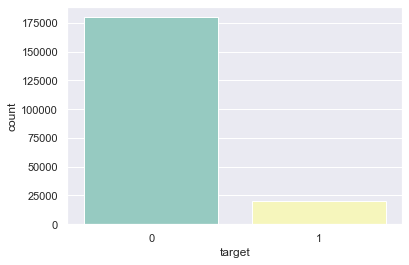

In [14]:
sns.countplot(df_train['target'], palette='Set3')

#### Observations:

- The class distribution in the target is ~90:10. This is a clear indication of Class Imbalance.
- We will be using SMOTE to deal with this issue later.

## Missing Value Analysis

Let's check for missing values in our dataset.

In [15]:
#Creating a dataframe of missing values per feature.
missing_val = pd.DataFrame(df_train.isnull().sum())

missing_val

,0
target,0
var_0,0
var_1,0
var_2,0
var_3,0
...,...
var_195,0
var_196,0
var_197,0
var_198,0


In [16]:
missing_val.sum()

0    0
dtype: int64

- No missing values.

## Univariate Analysis

In [17]:
target = df_train['target']

In [18]:
df_train = df_train.drop('target', axis = 1)

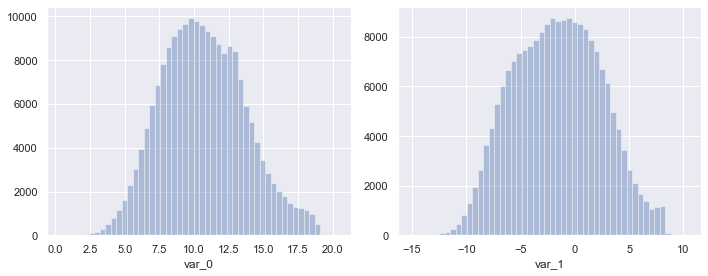

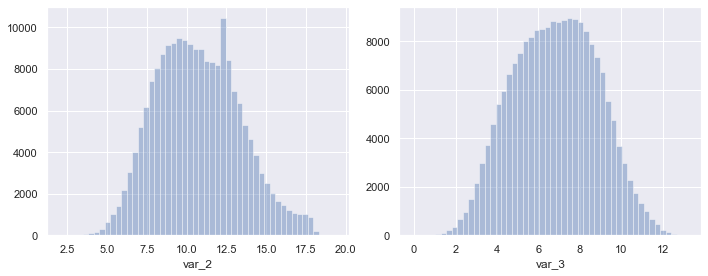

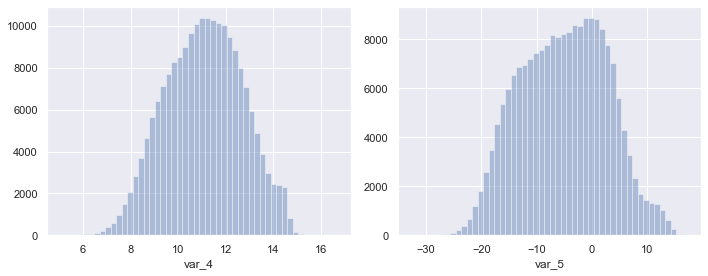

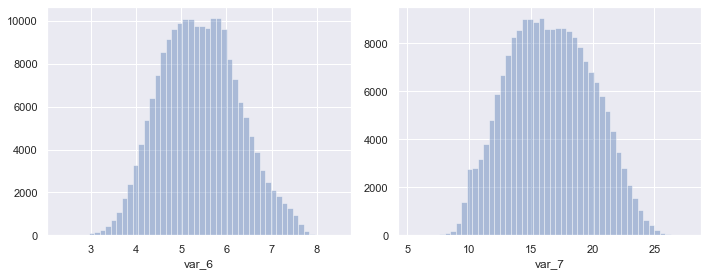

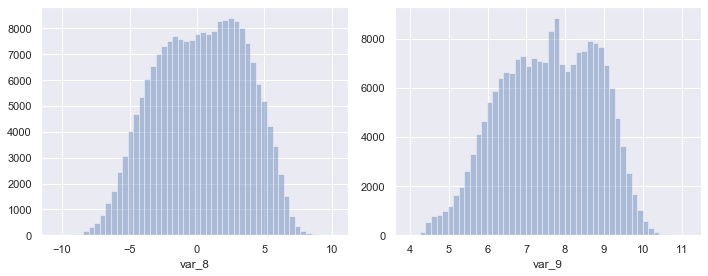

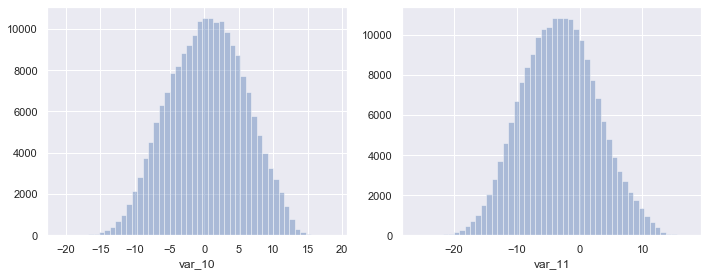

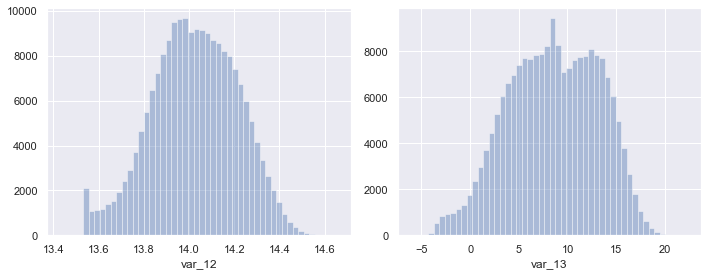

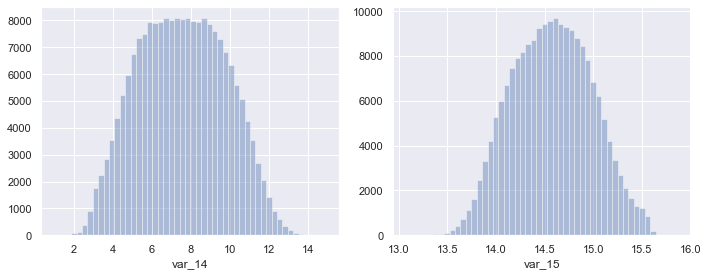

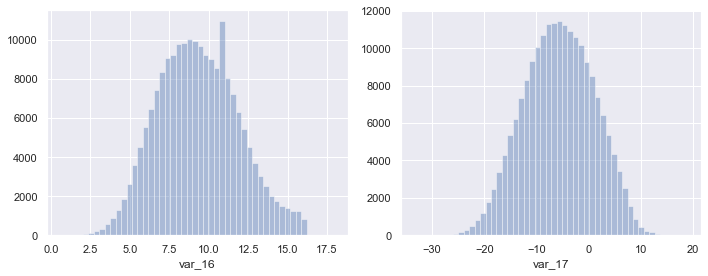

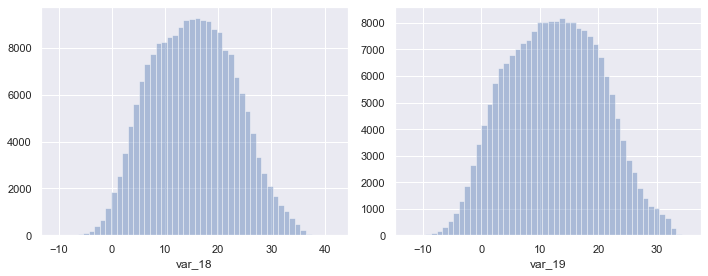

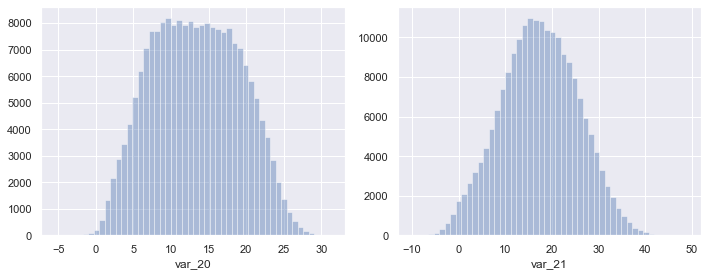

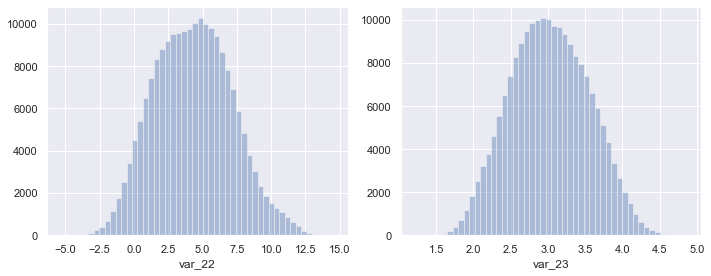

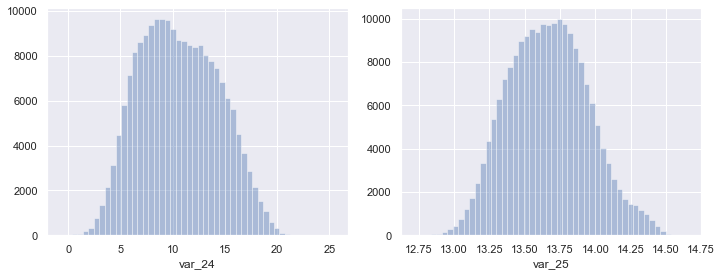

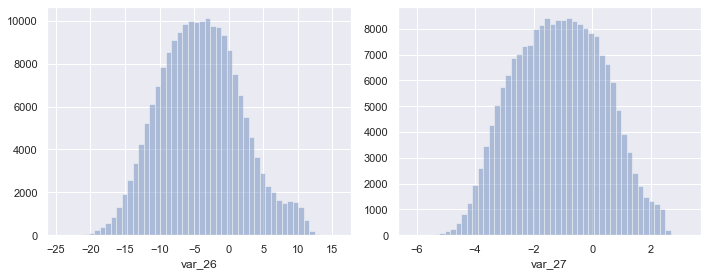

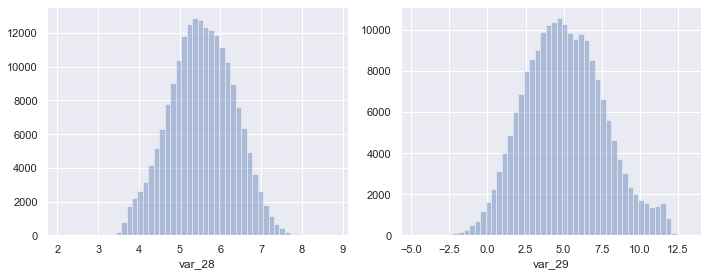

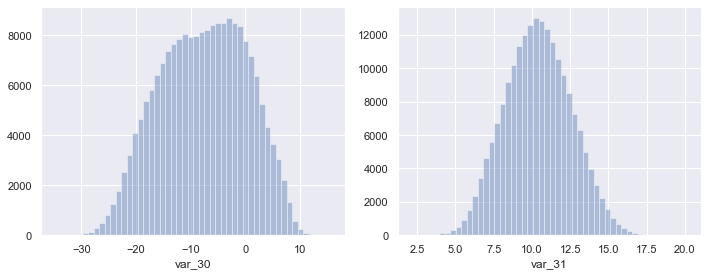

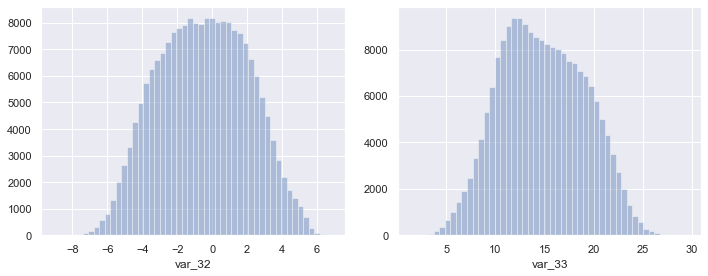

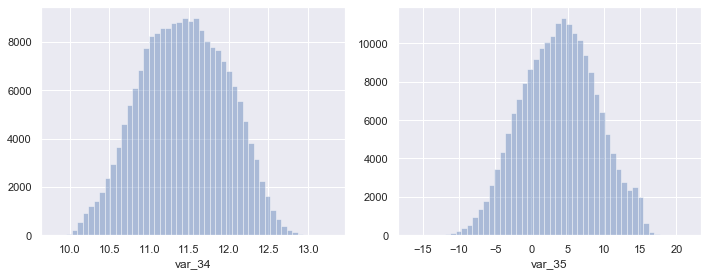

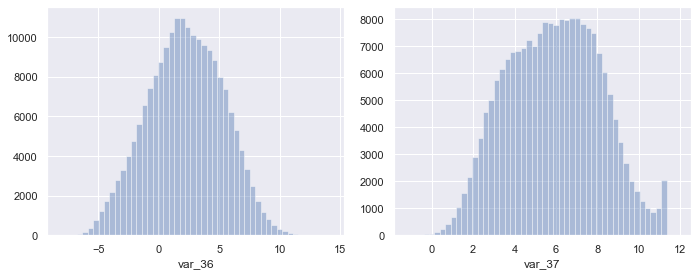

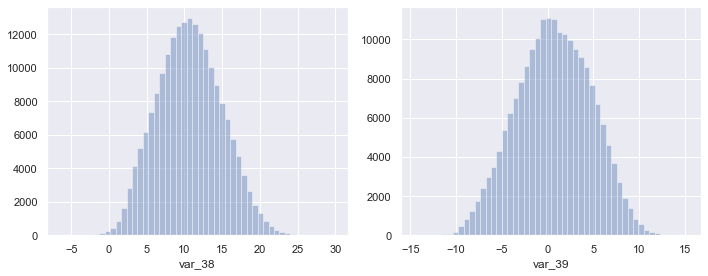

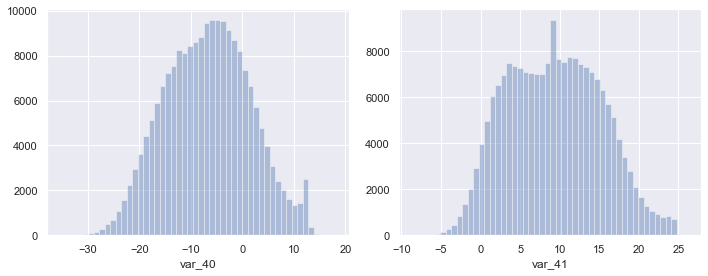

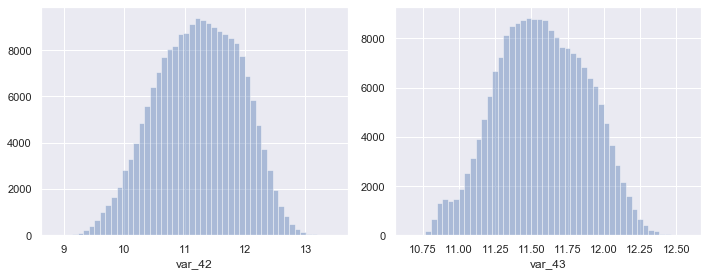

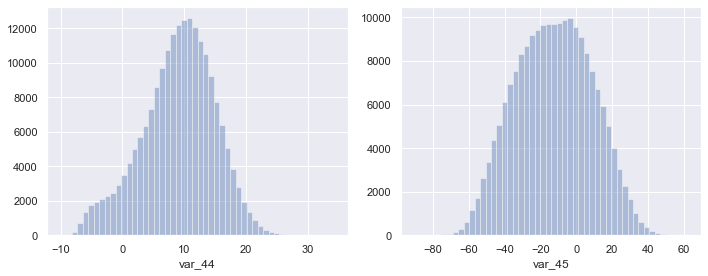

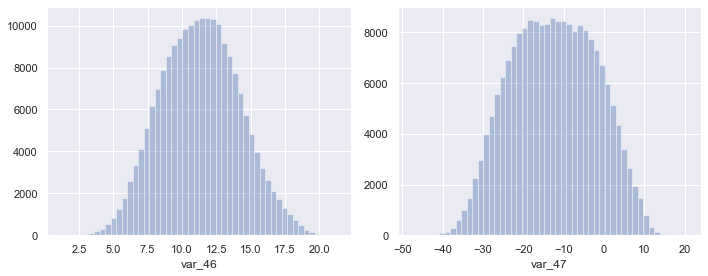

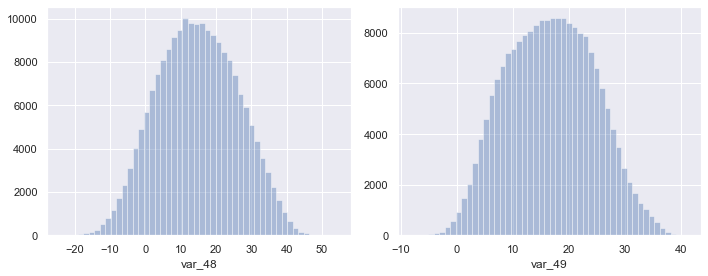

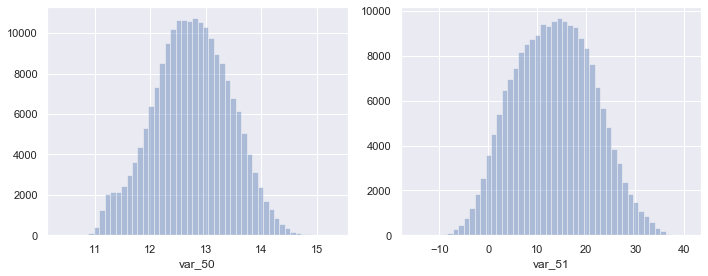

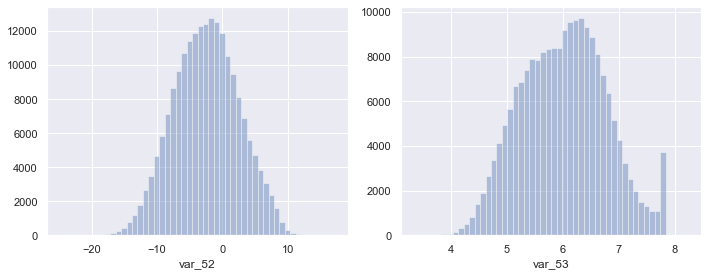

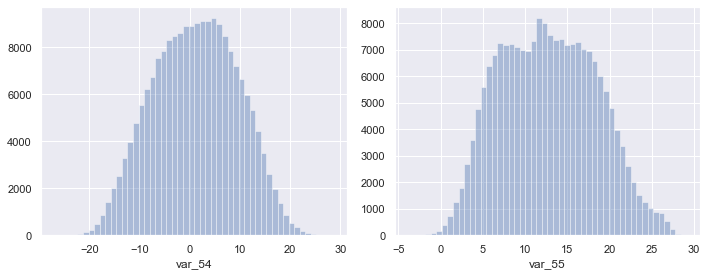

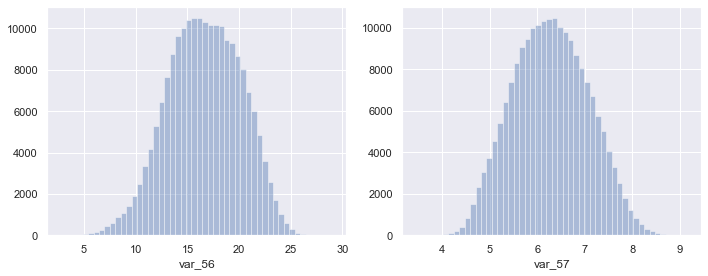

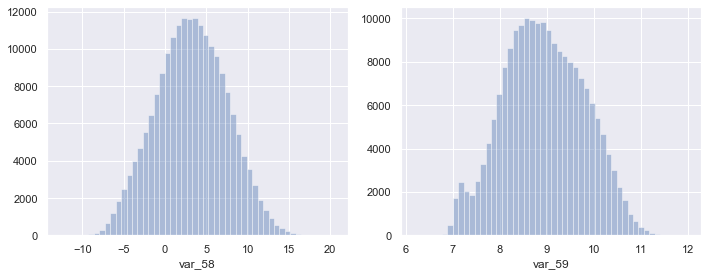

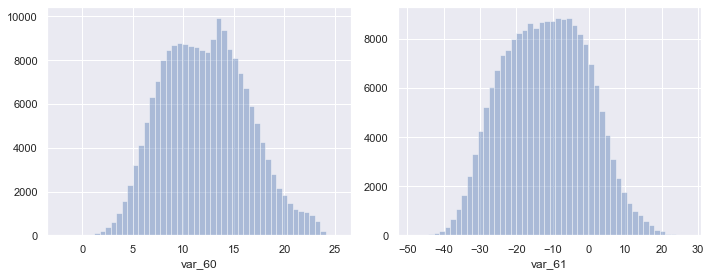

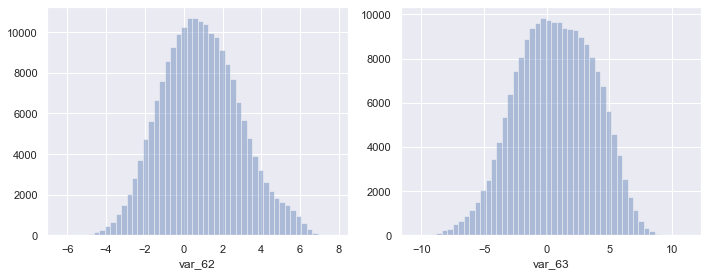

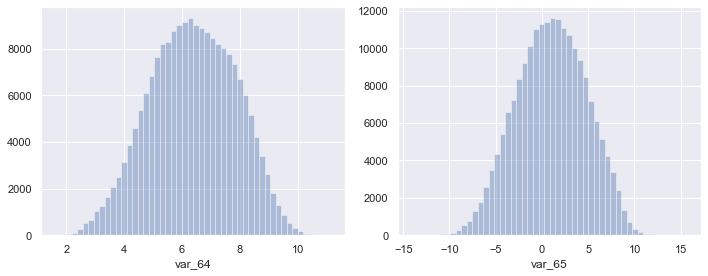

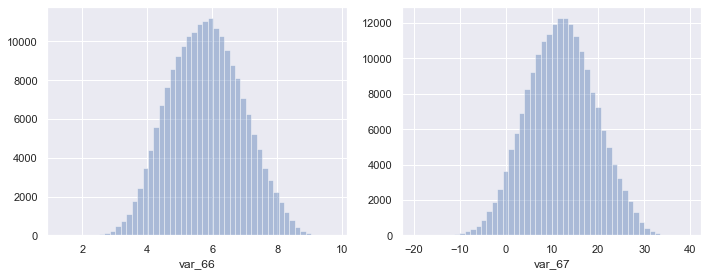

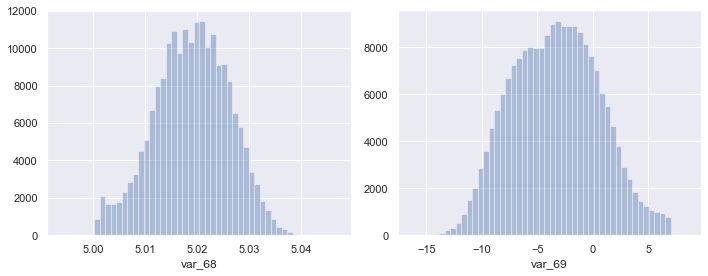

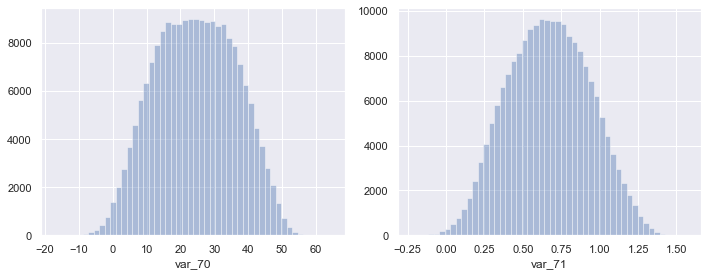

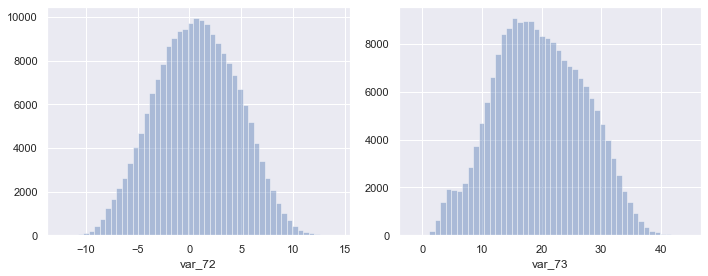

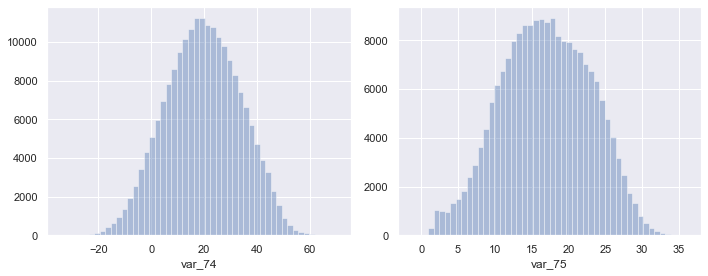

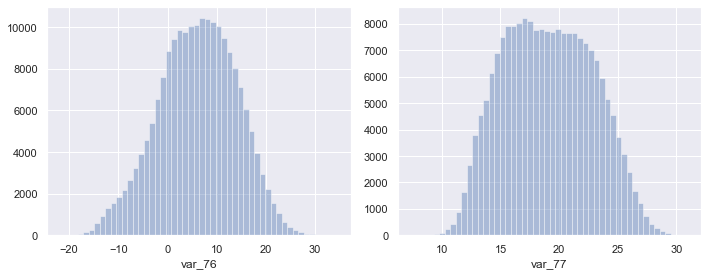

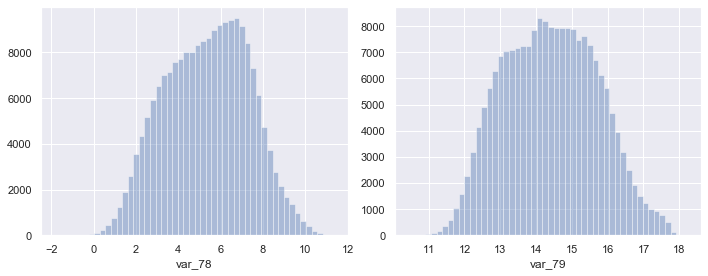

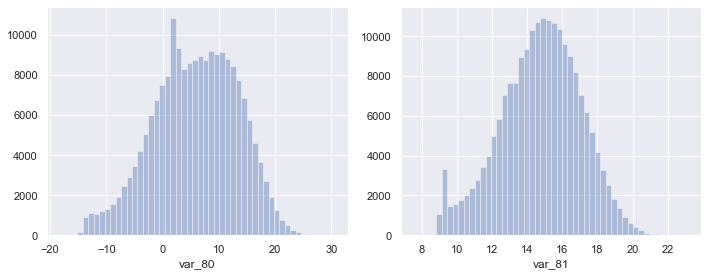

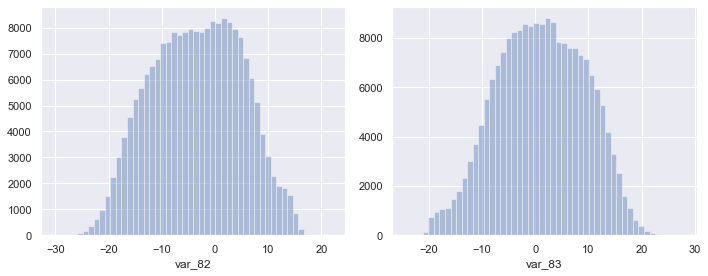

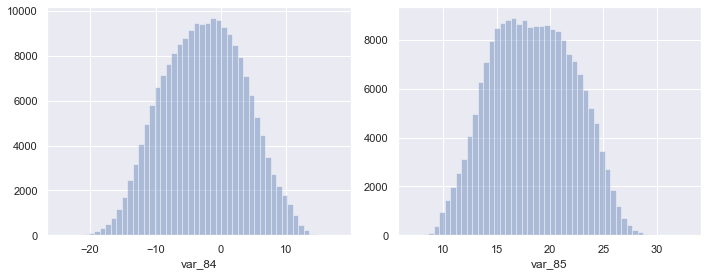

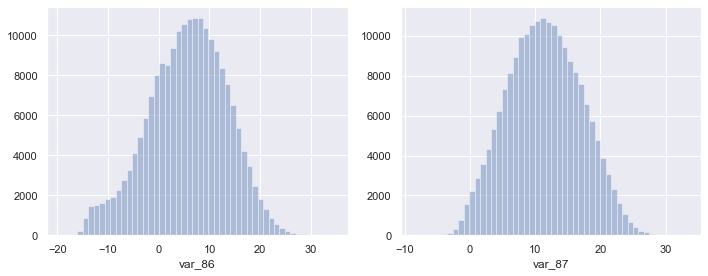

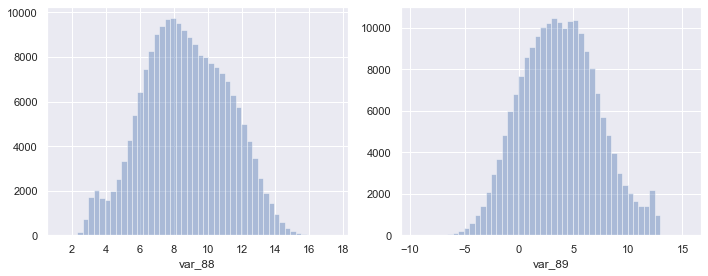

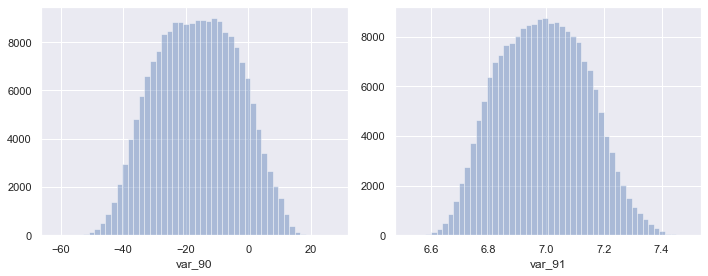

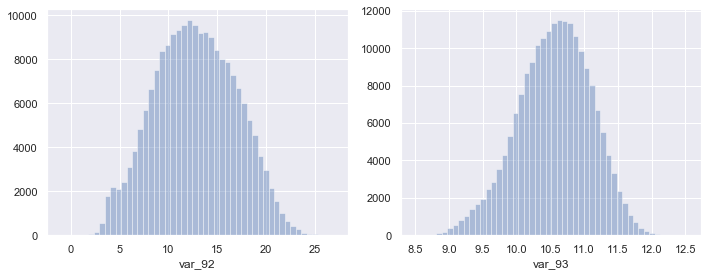

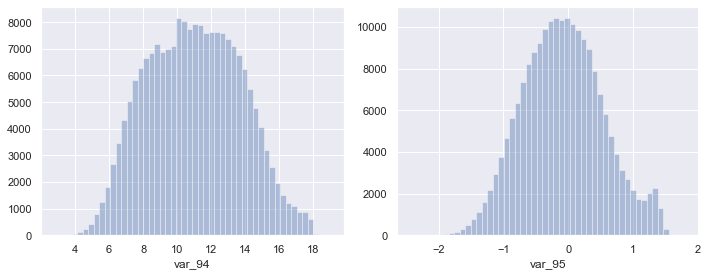

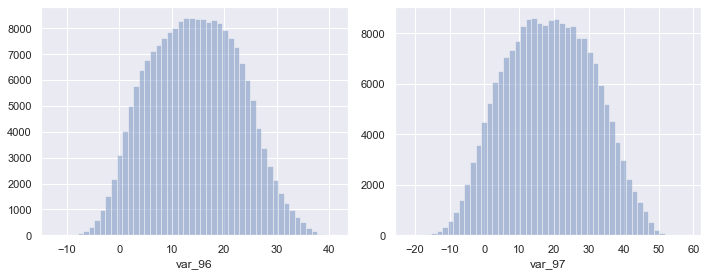

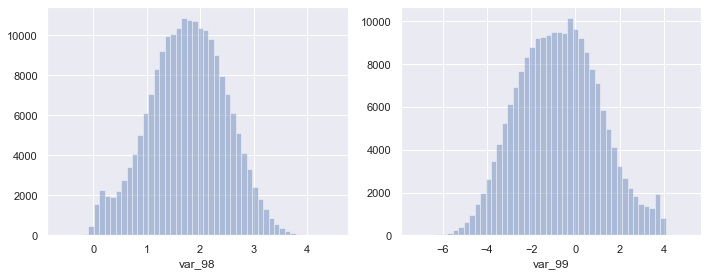

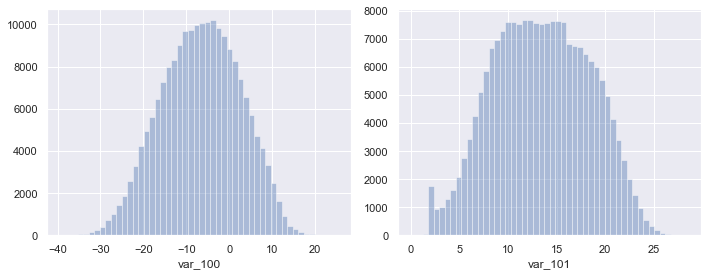

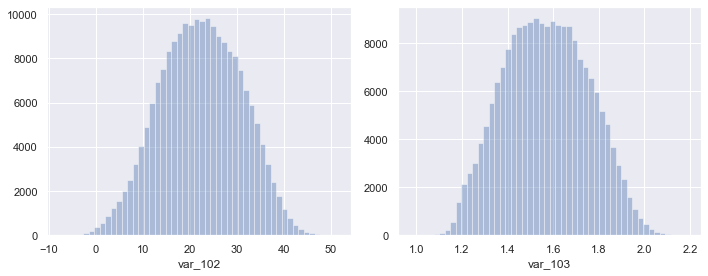

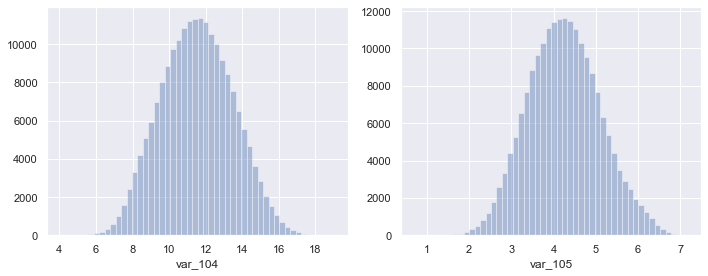

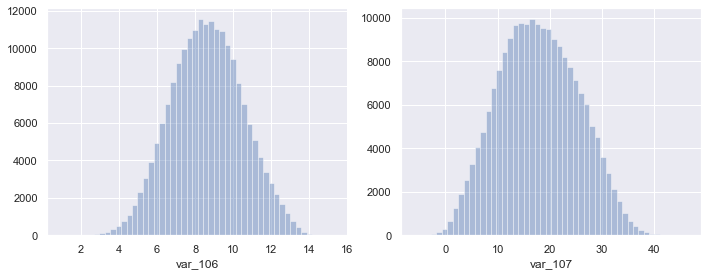

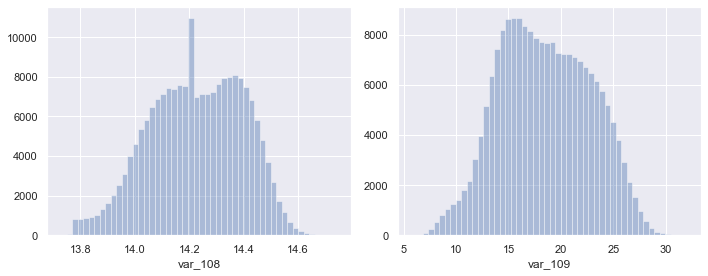

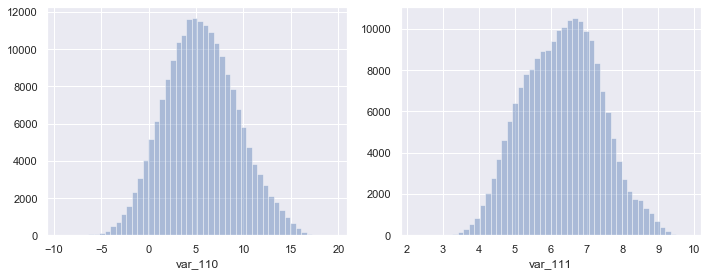

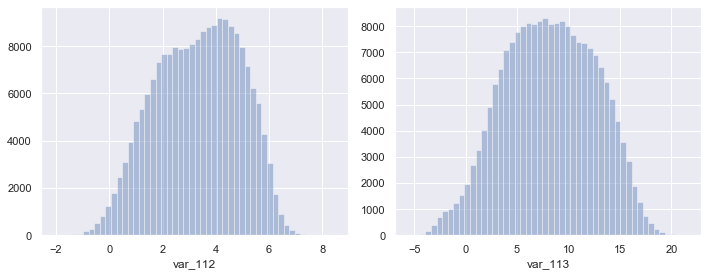

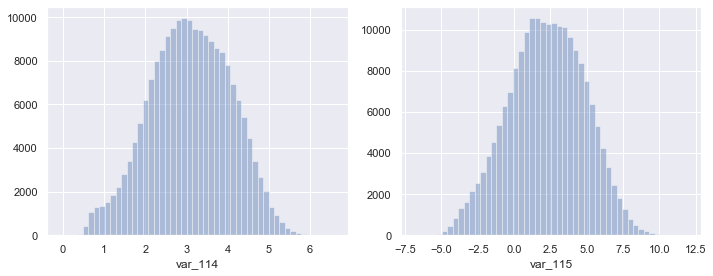

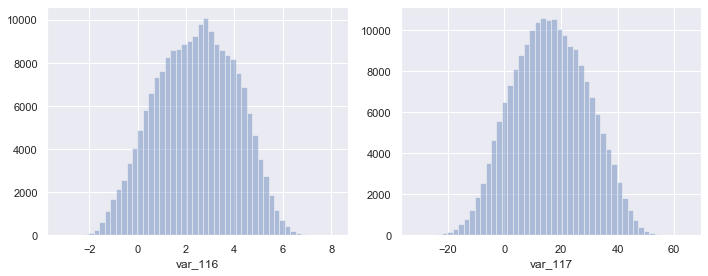

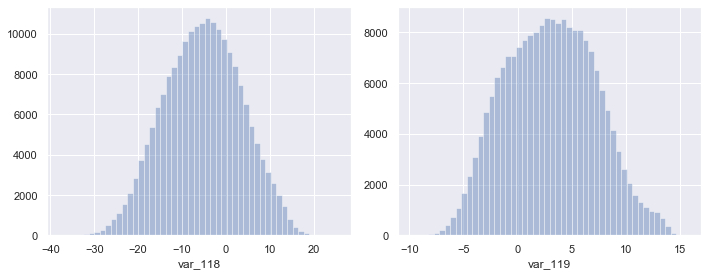

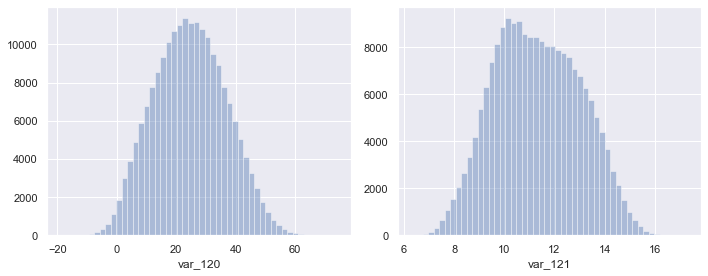

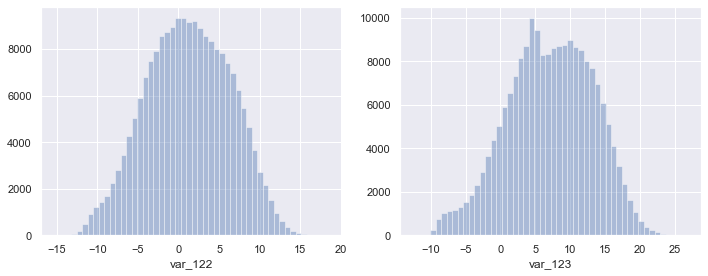

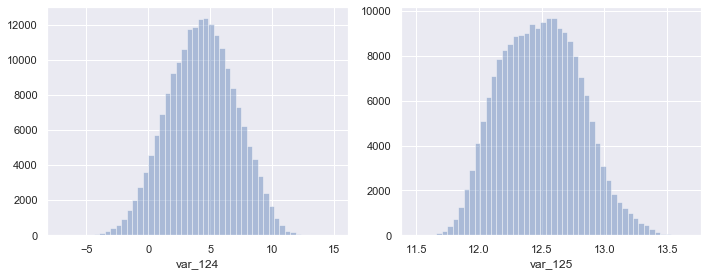

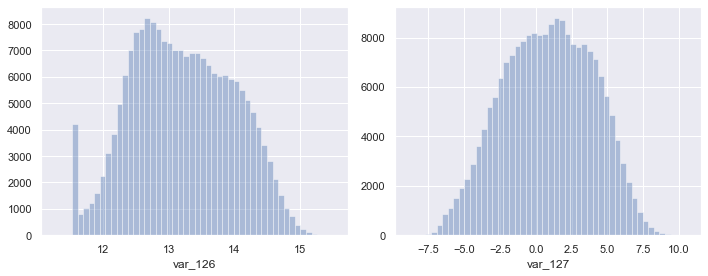

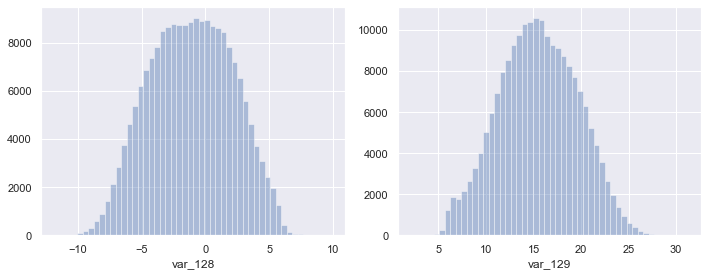

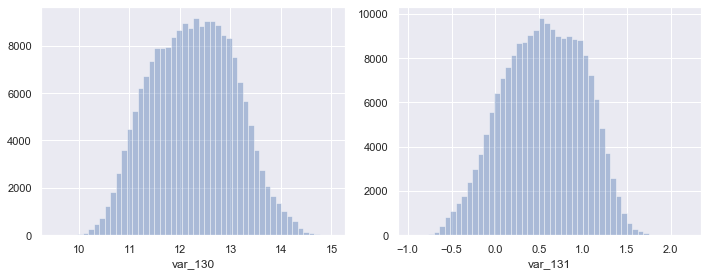

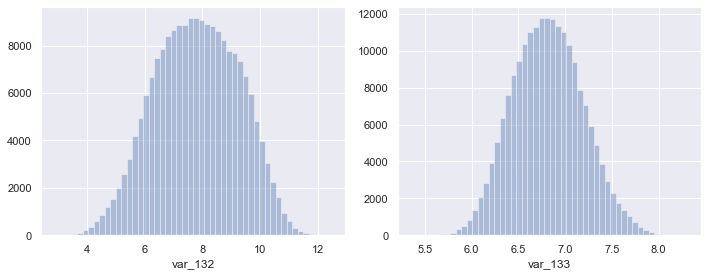

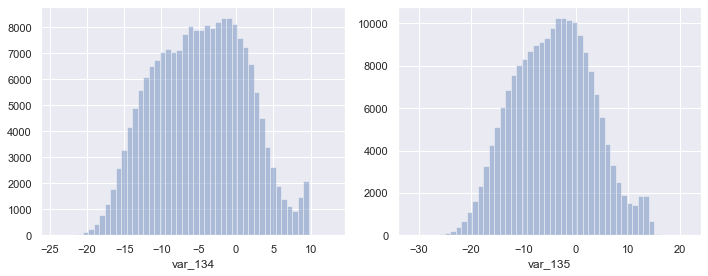

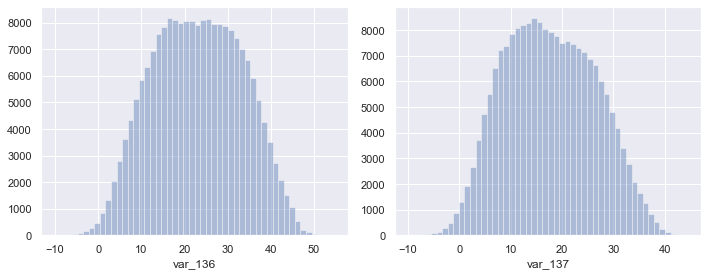

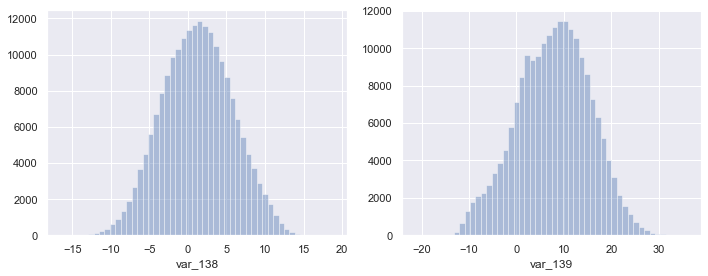

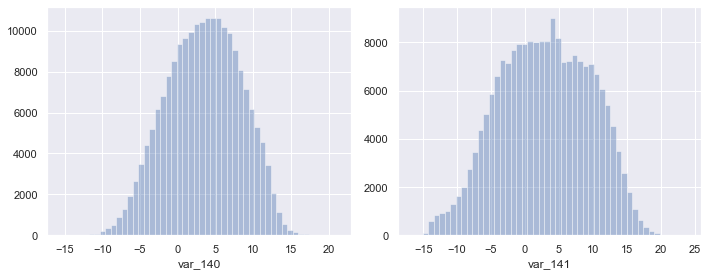

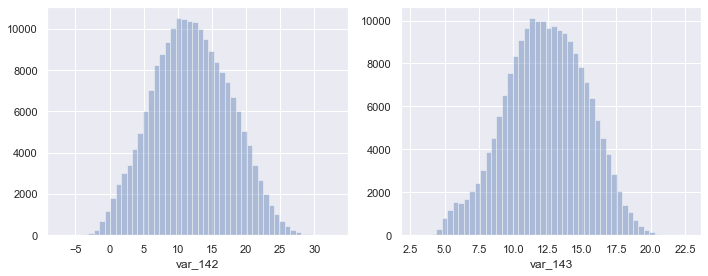

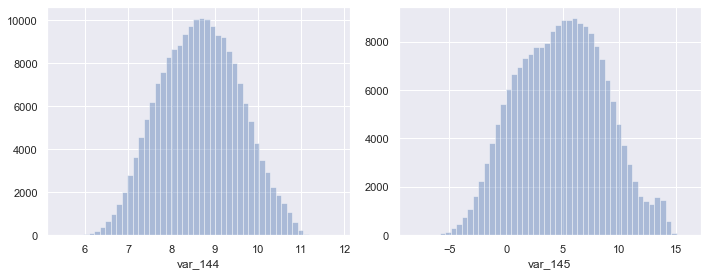

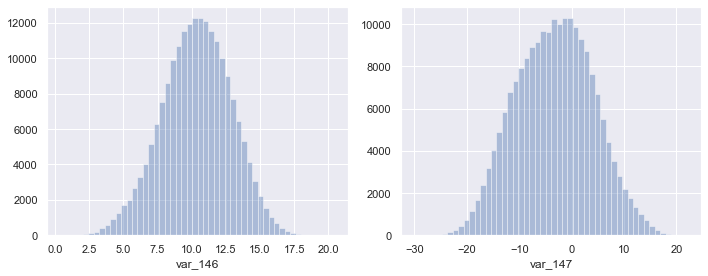

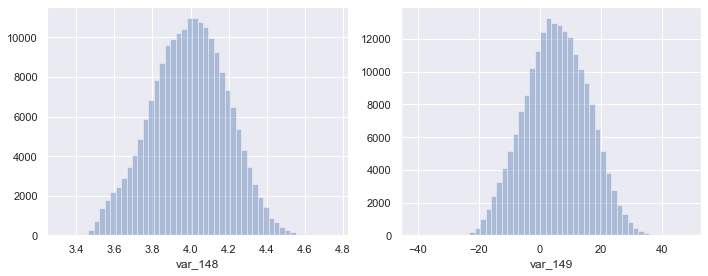

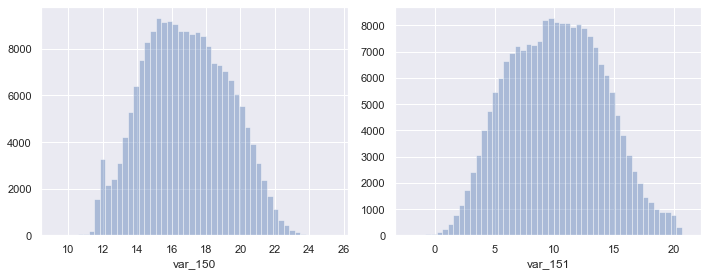

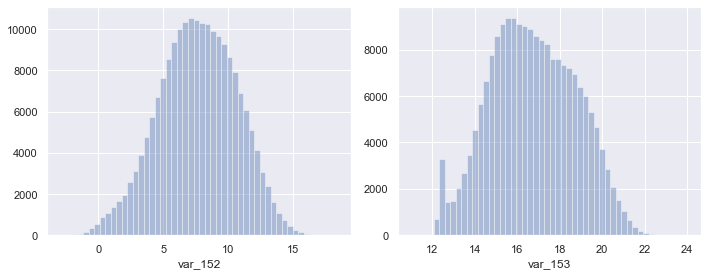

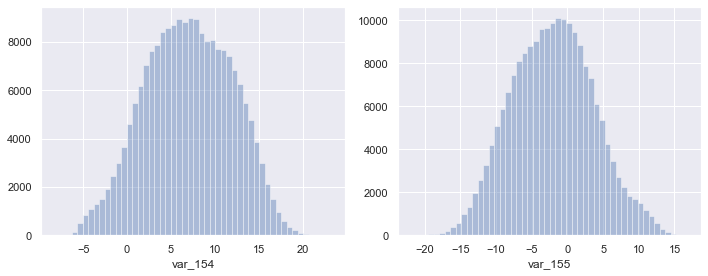

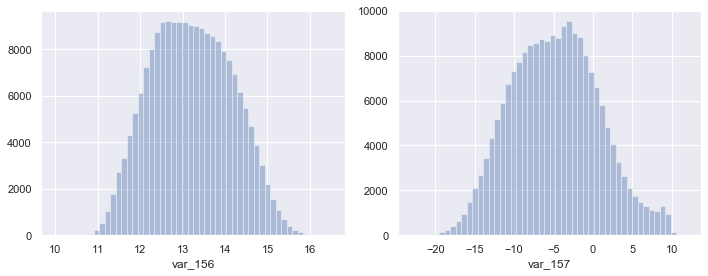

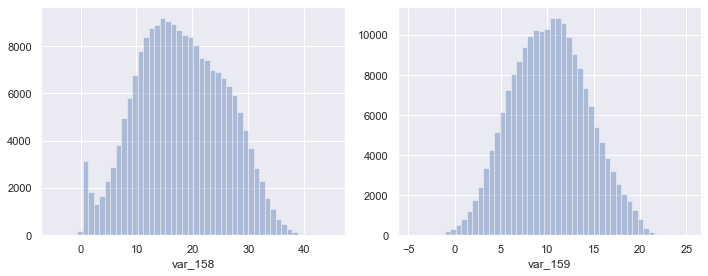

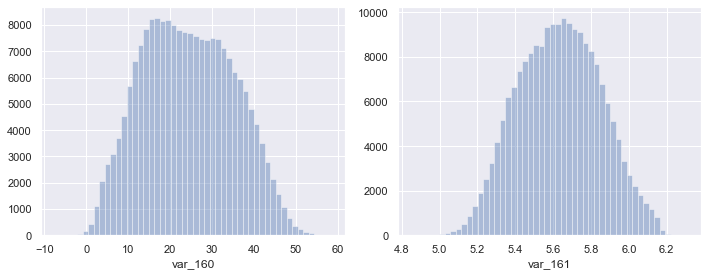

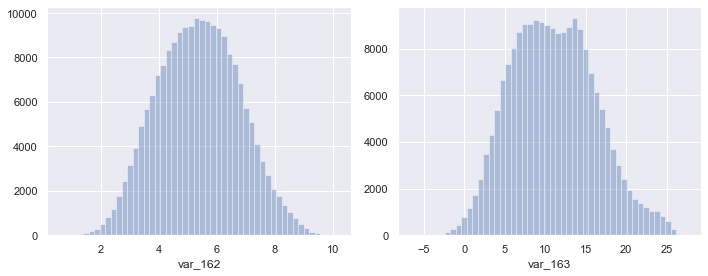

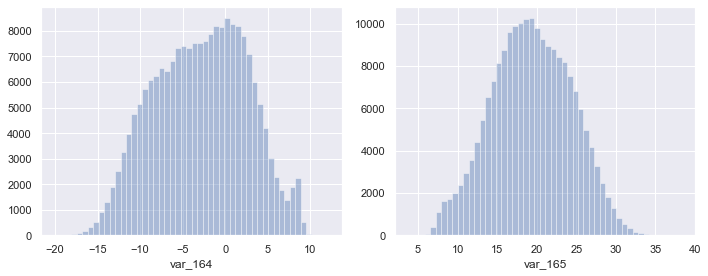

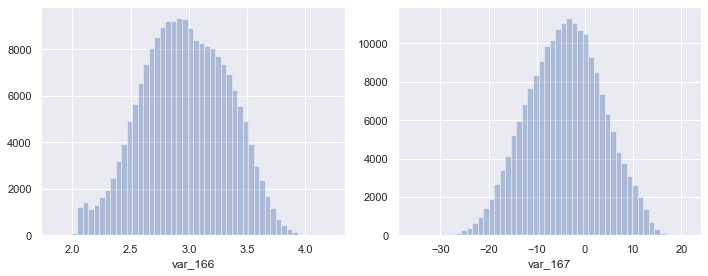

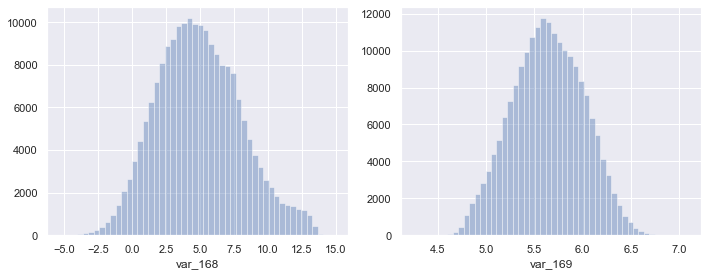

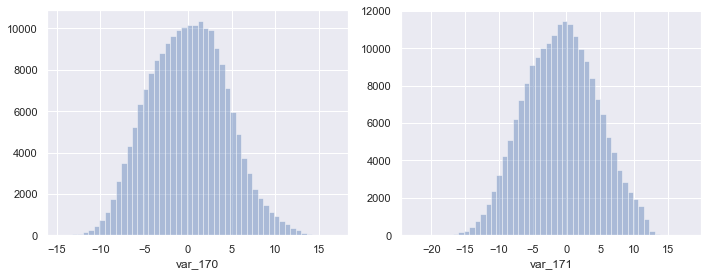

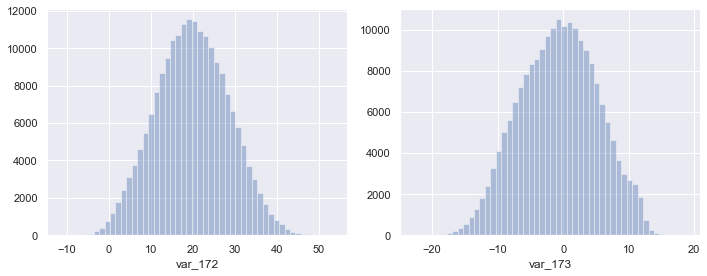

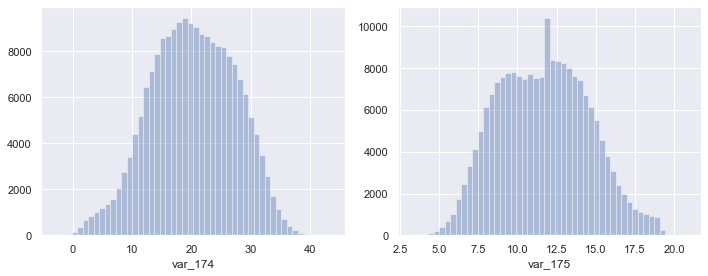

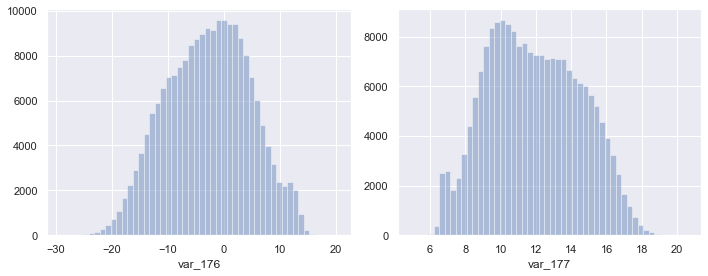

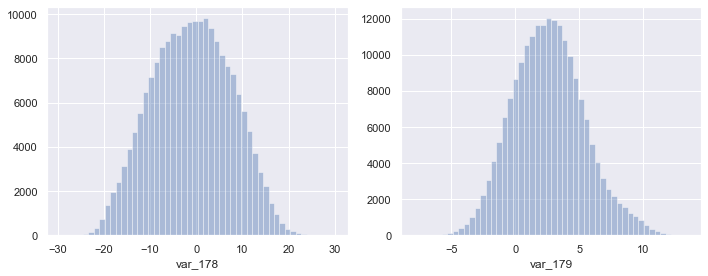

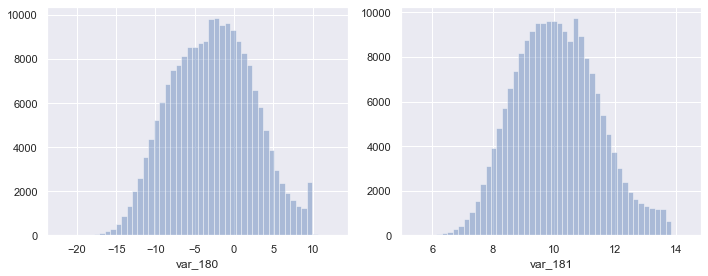

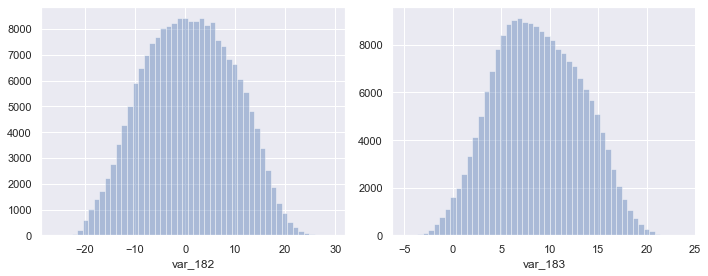

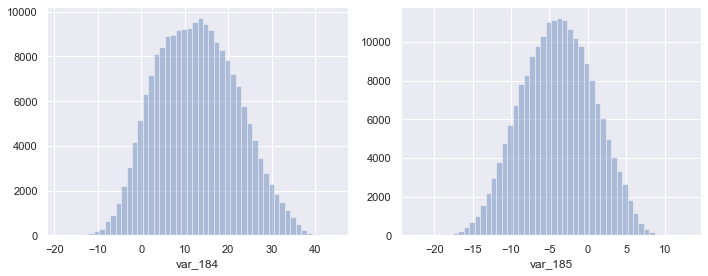

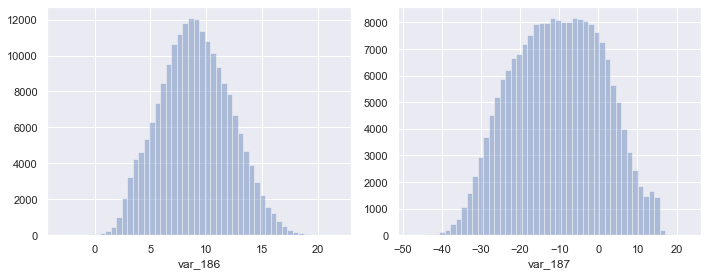

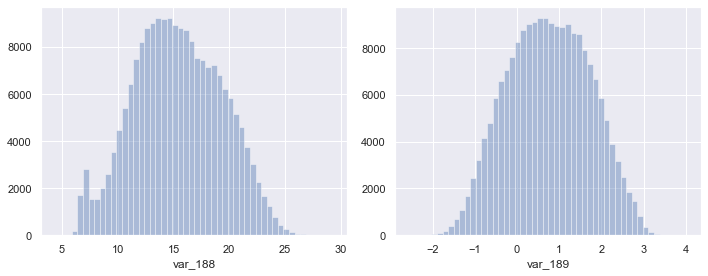

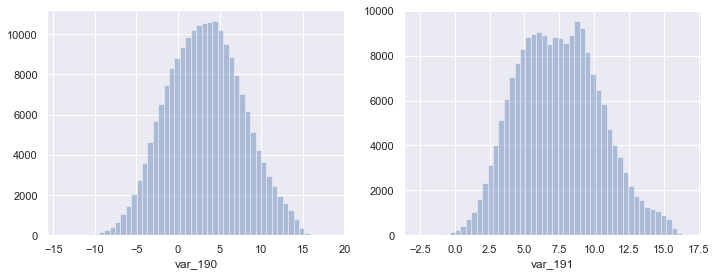

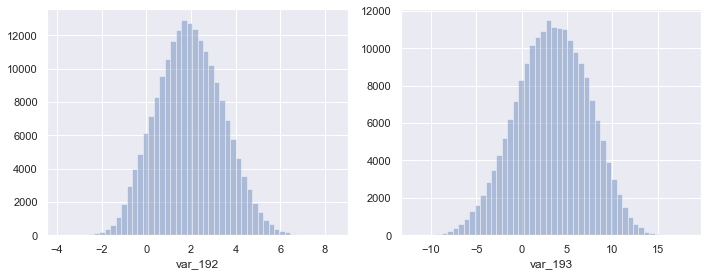

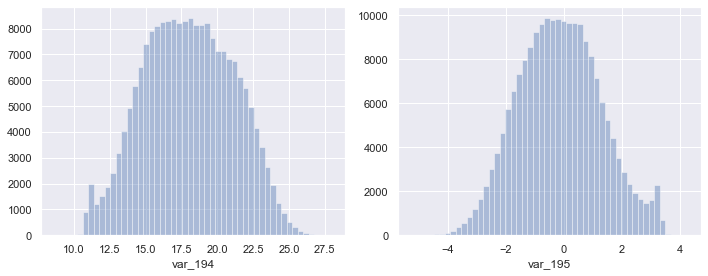

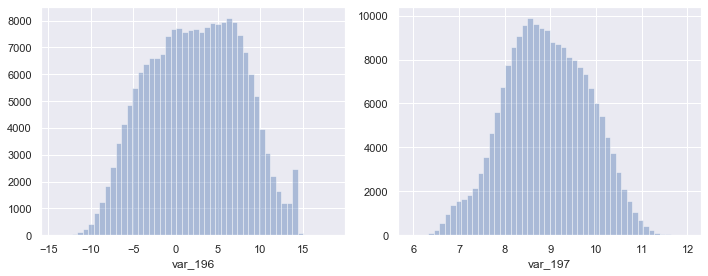

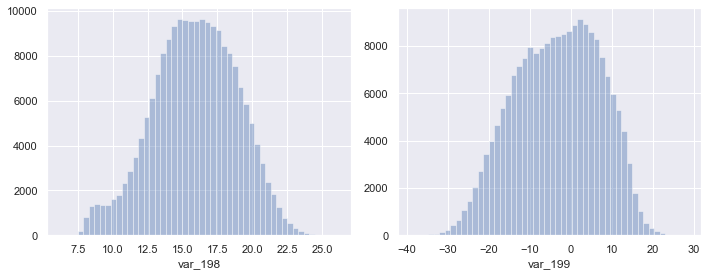

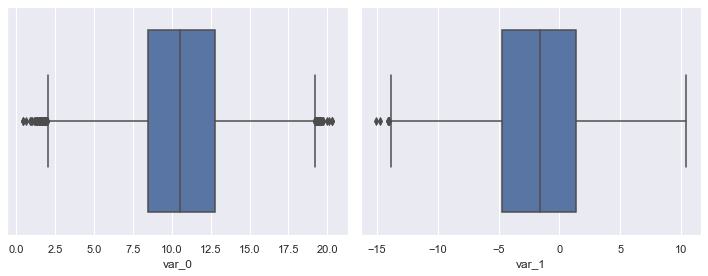

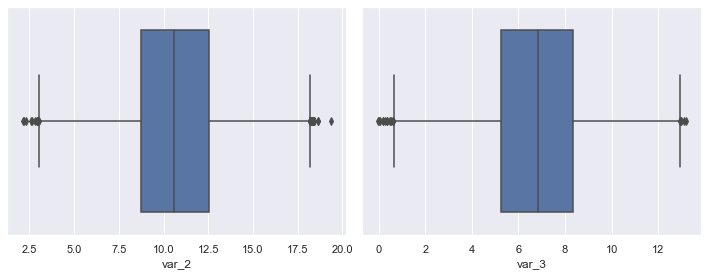

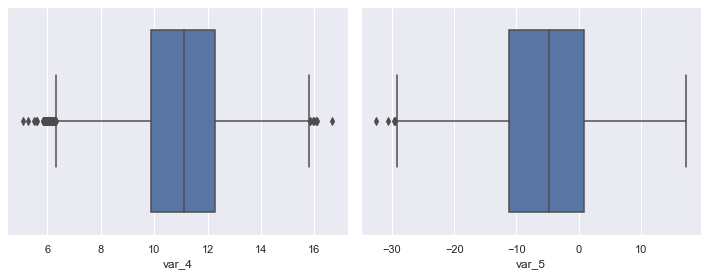

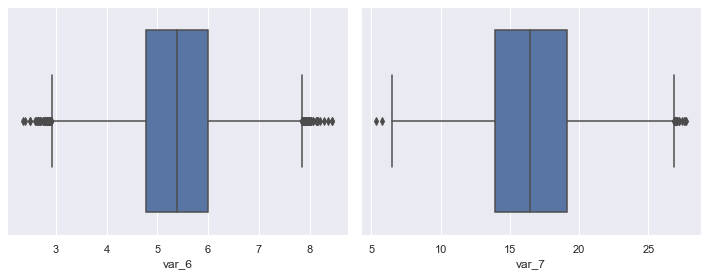

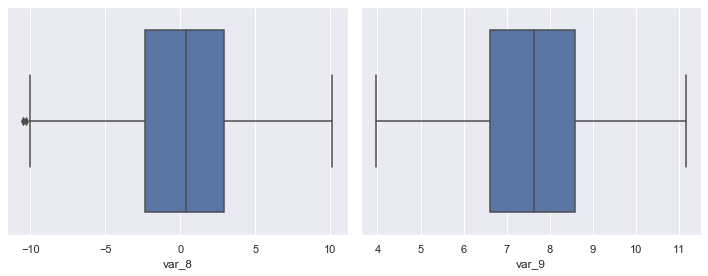

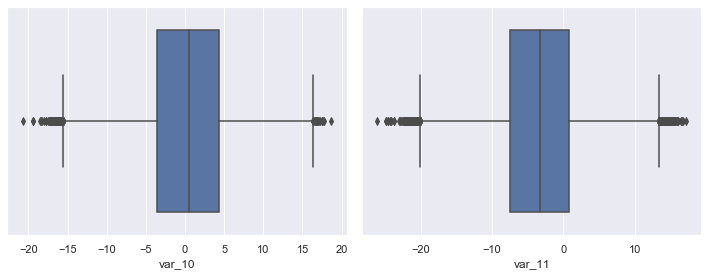

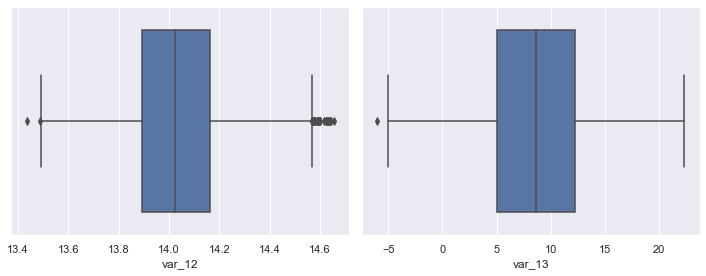

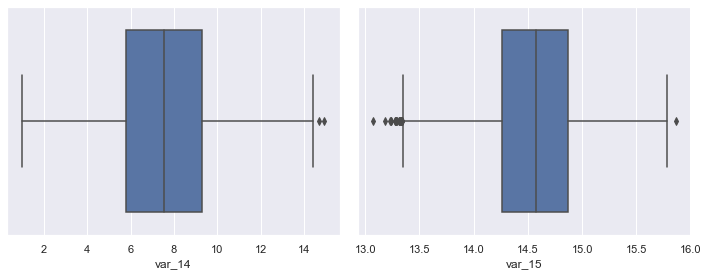

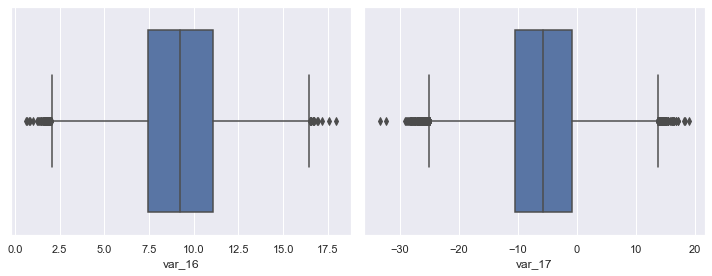

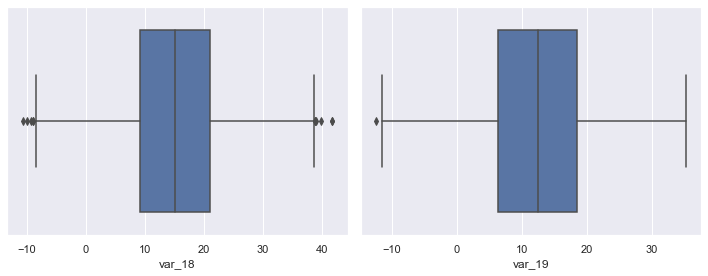

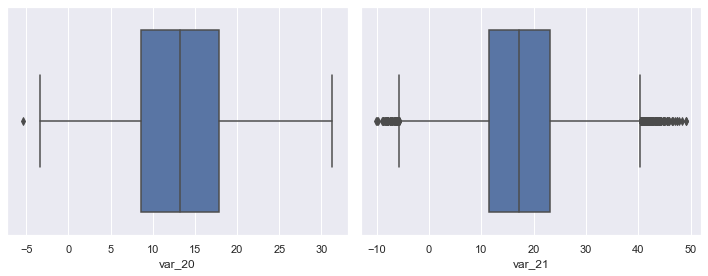

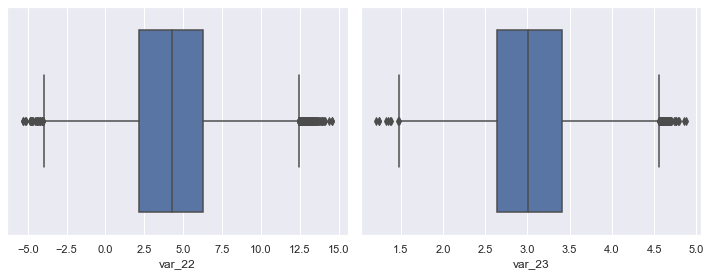

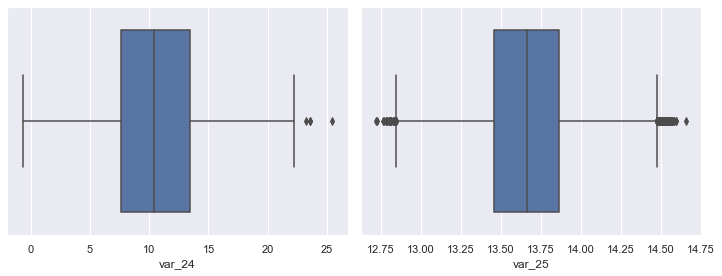

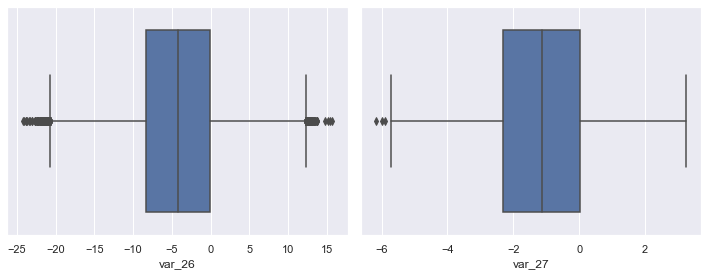

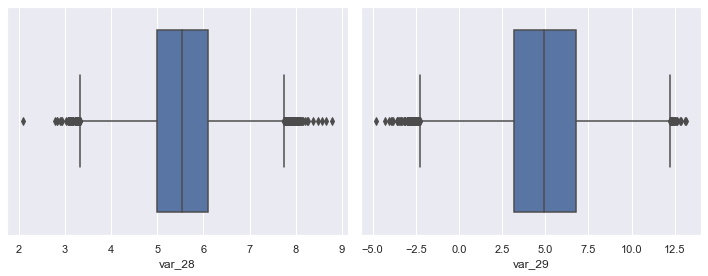

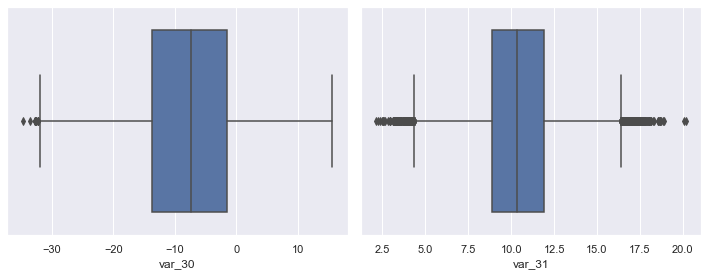

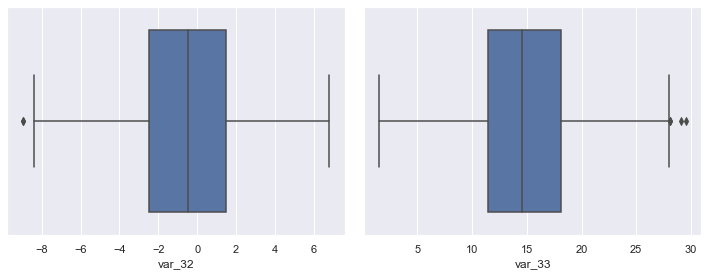

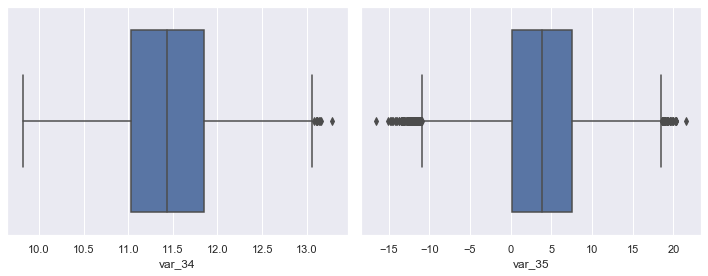

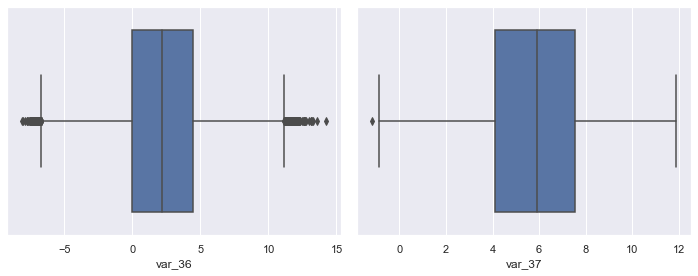

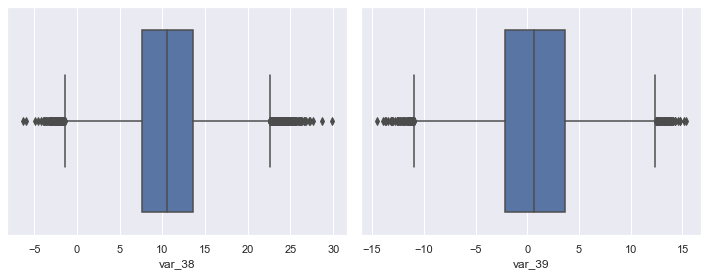

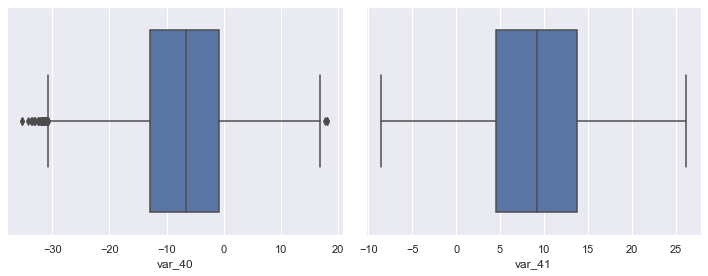

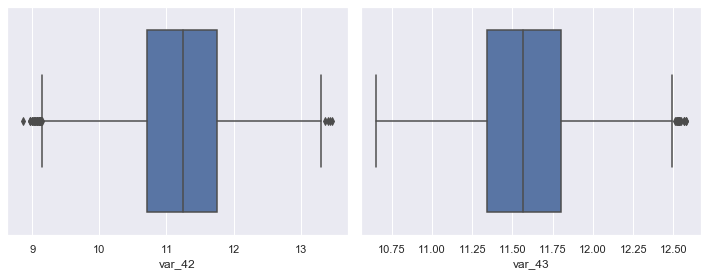

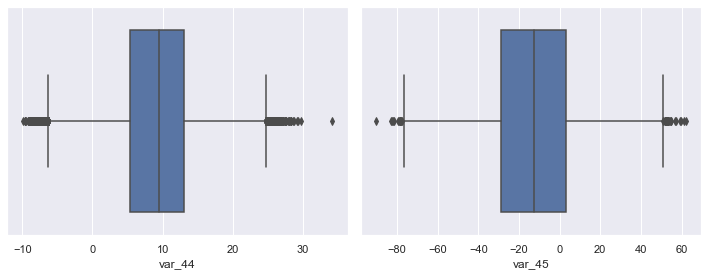

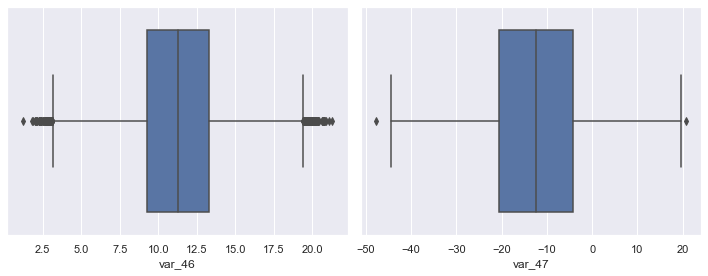

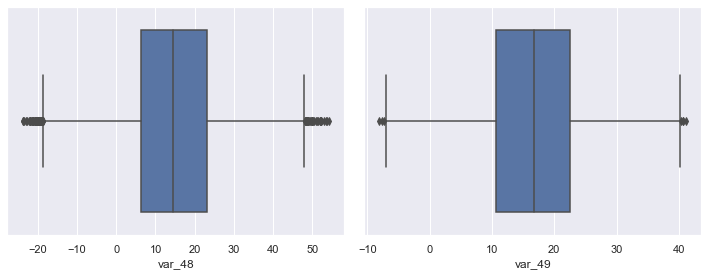

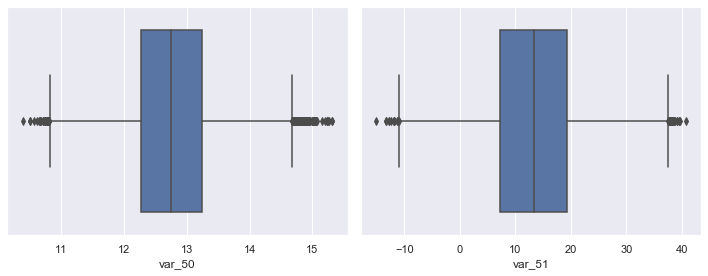

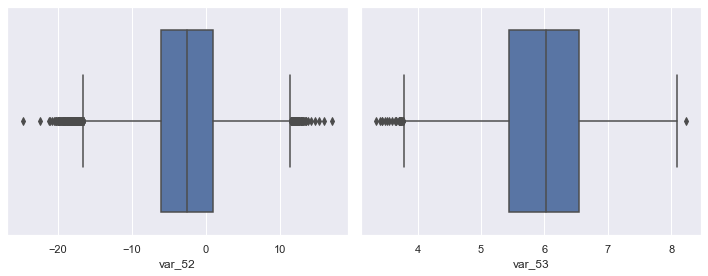

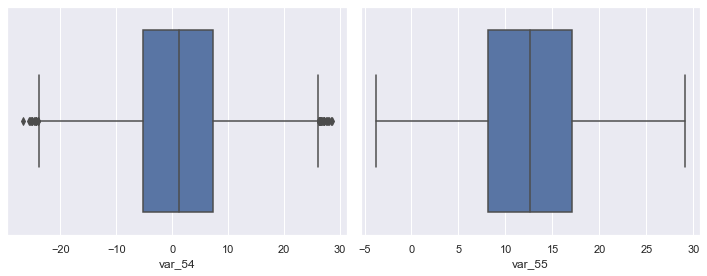

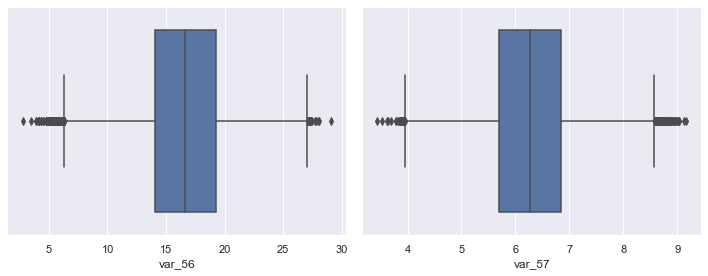

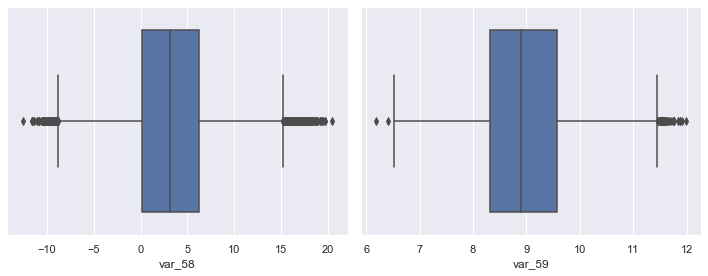

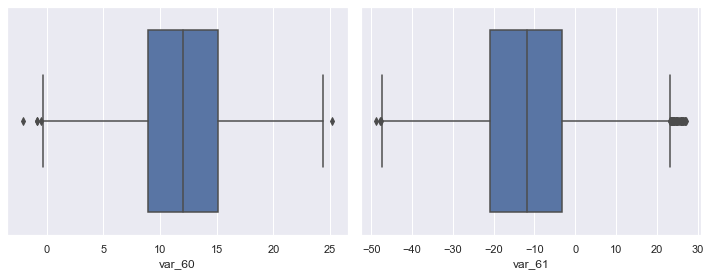

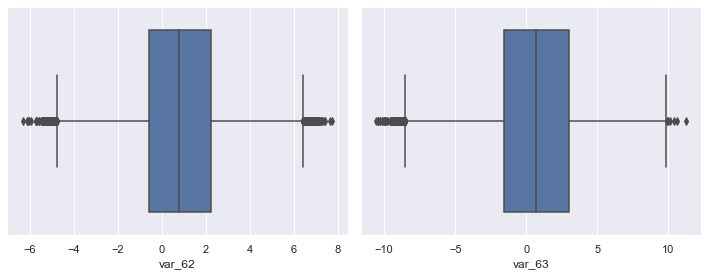

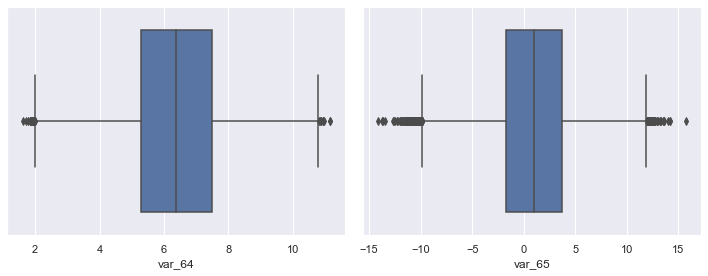

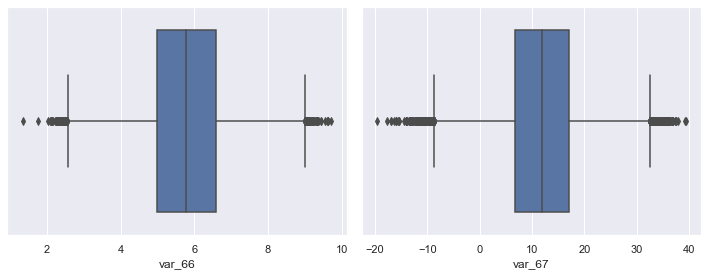

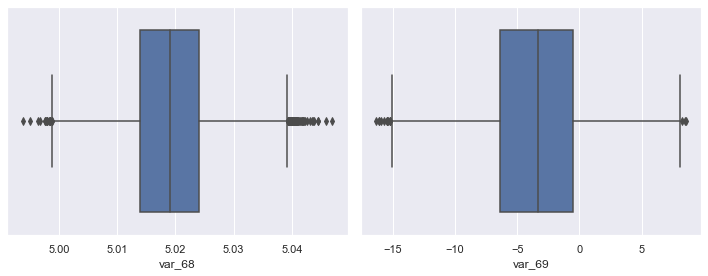

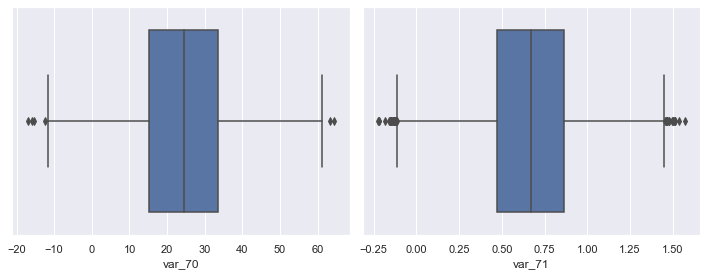

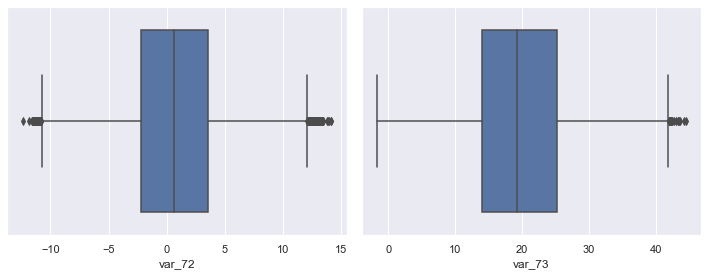

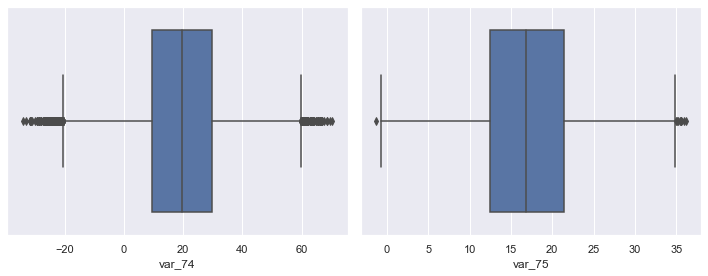

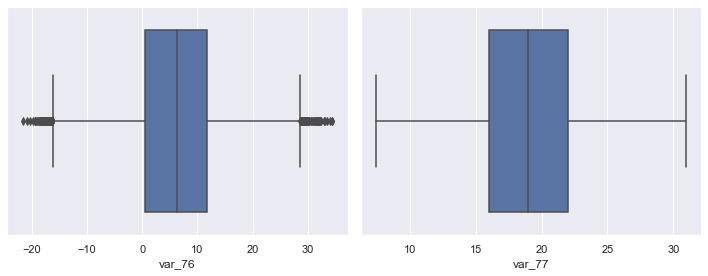

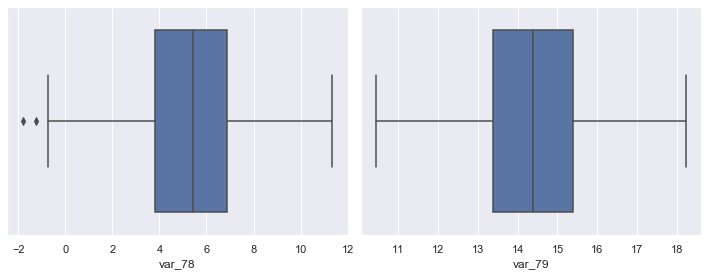

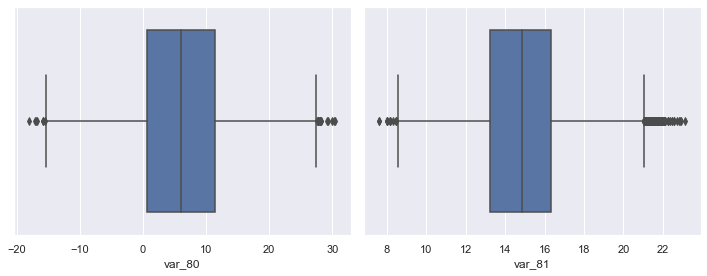

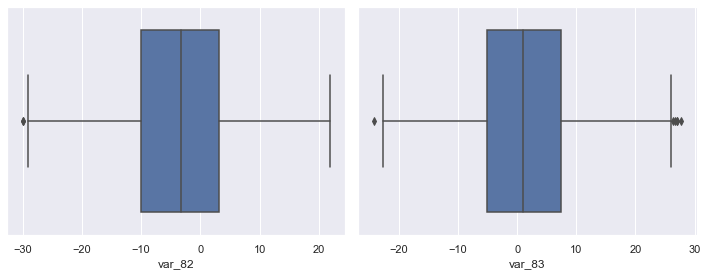

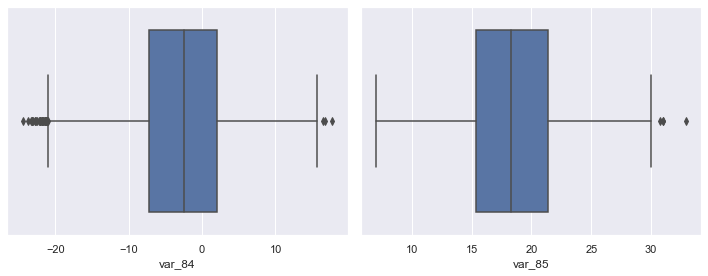

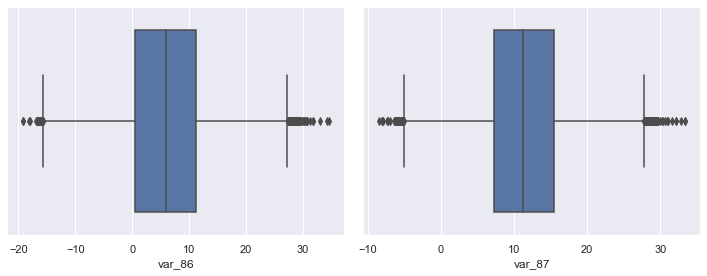

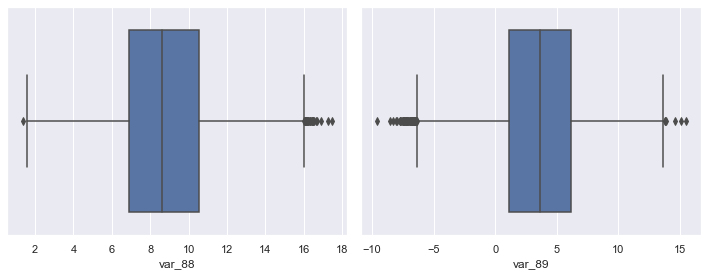

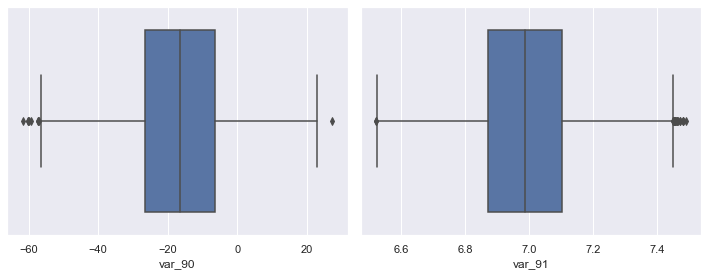

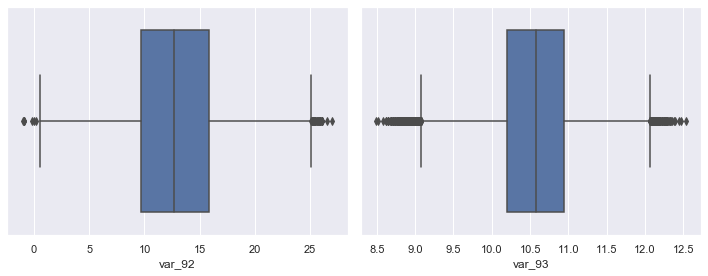

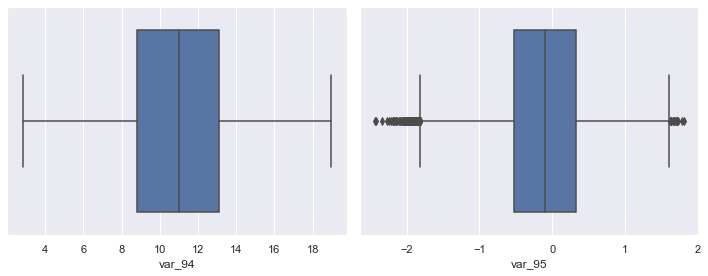

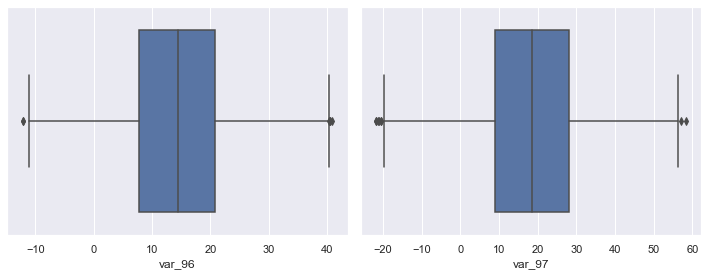

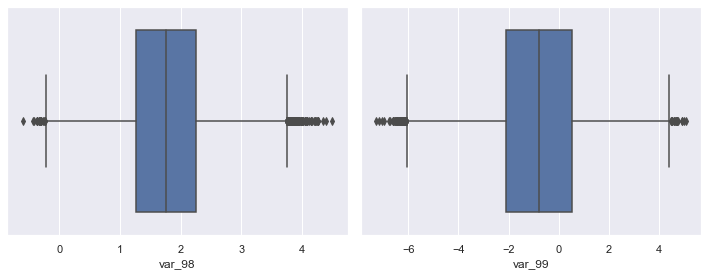

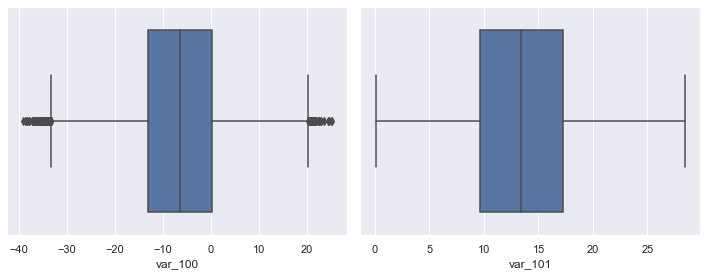

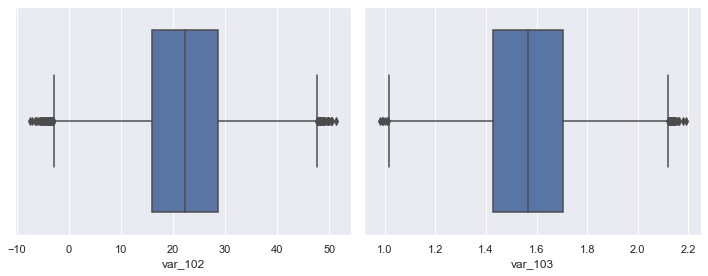

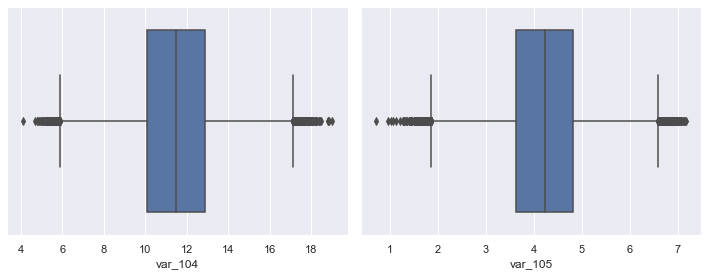

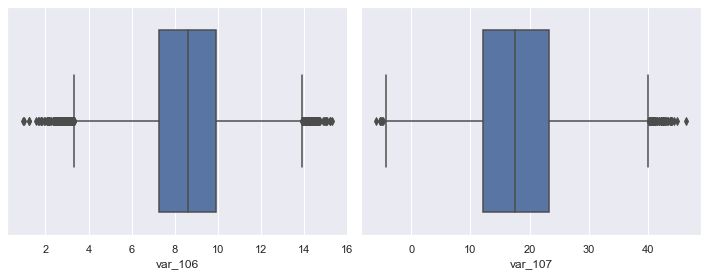

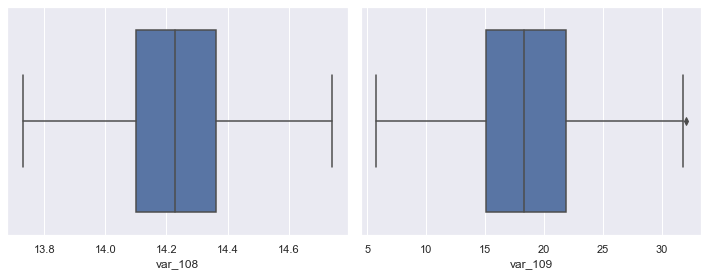

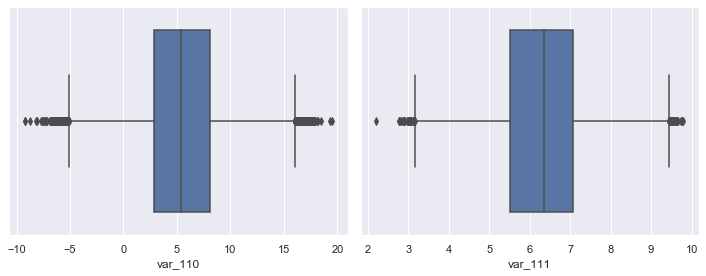

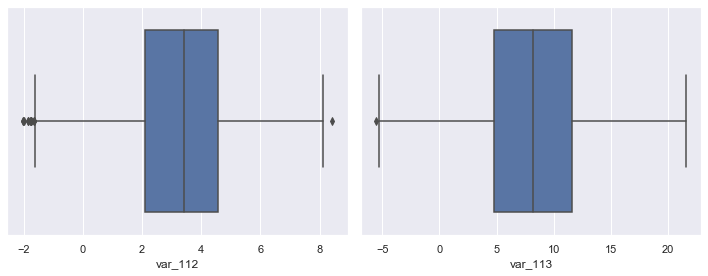

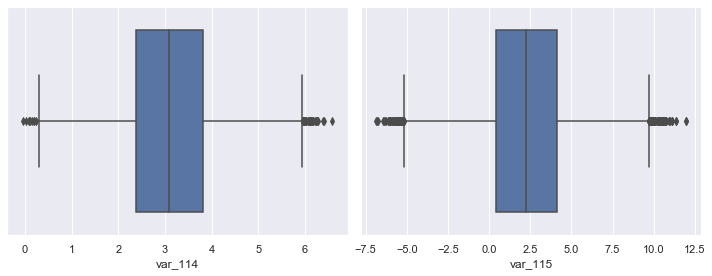

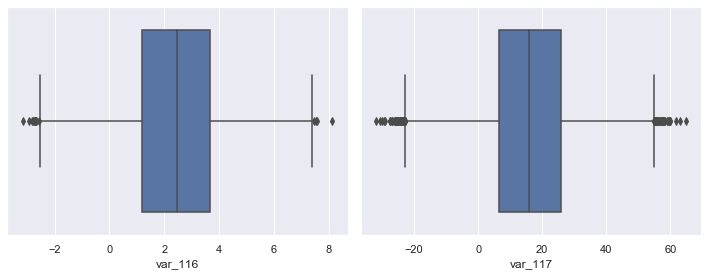

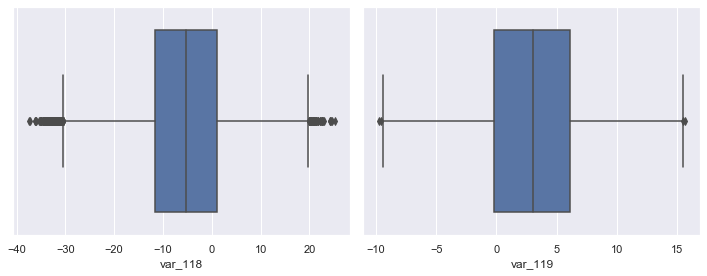

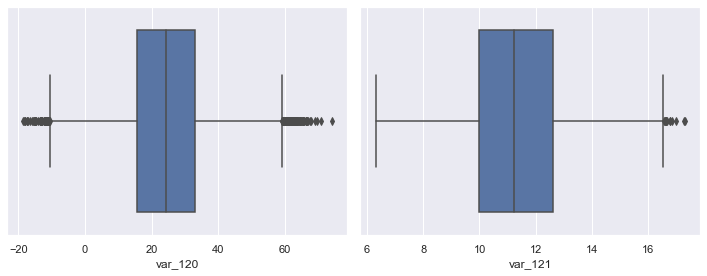

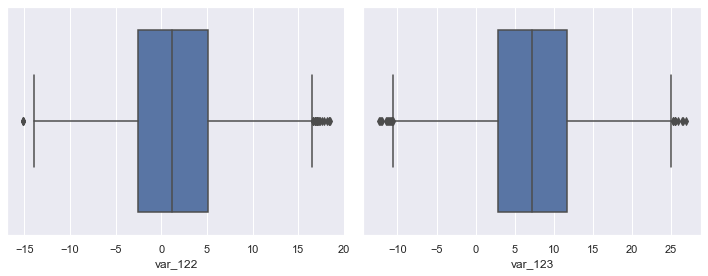

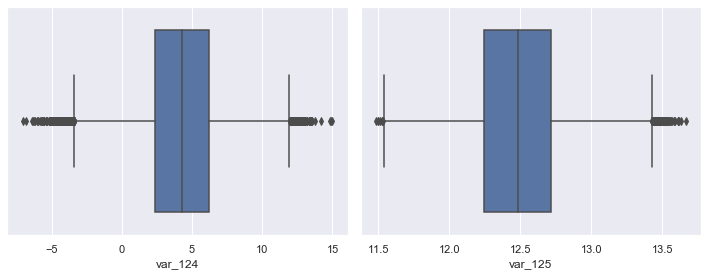

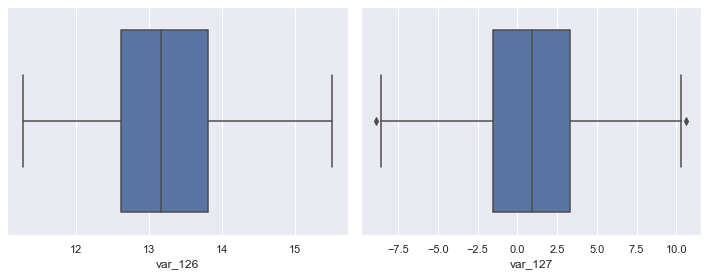

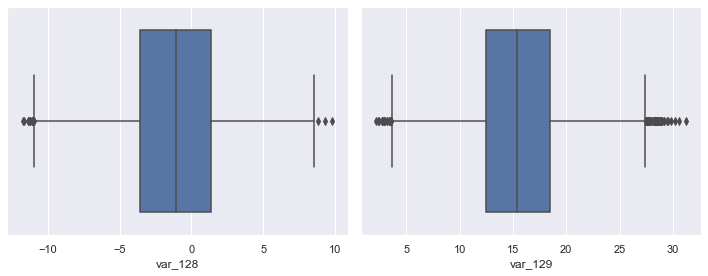

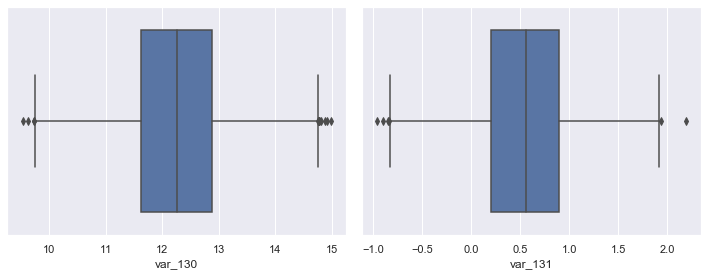

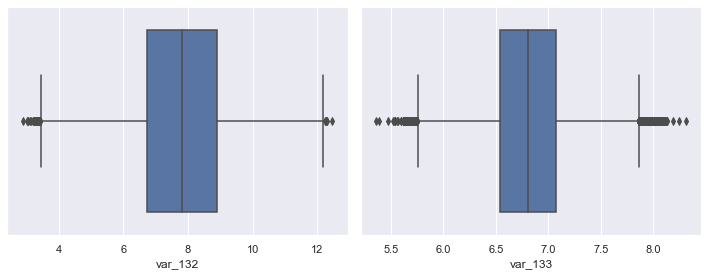

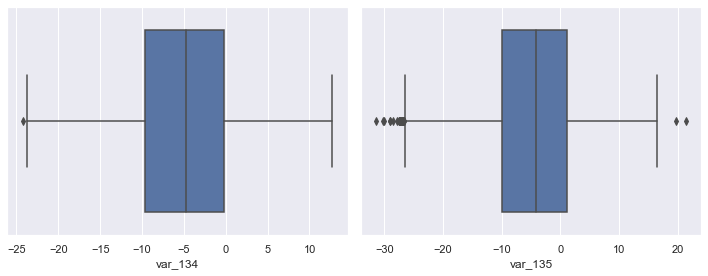

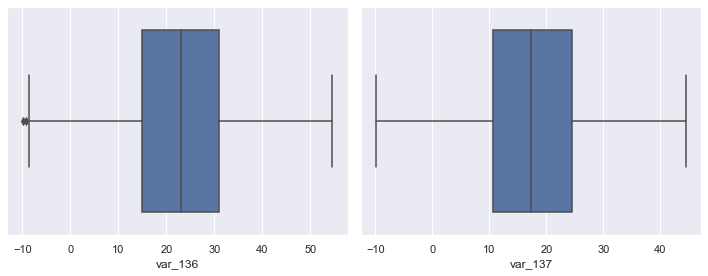

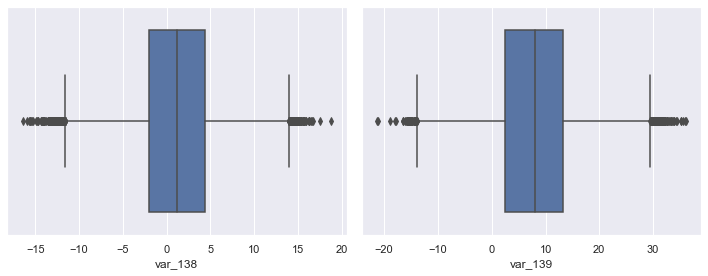

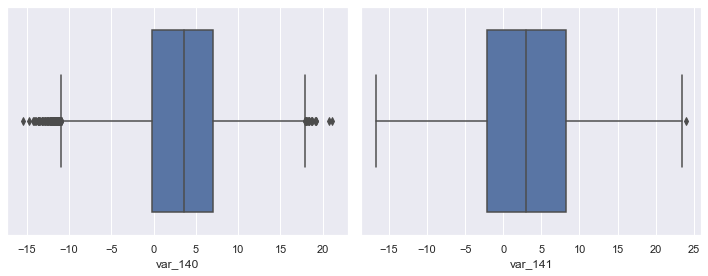

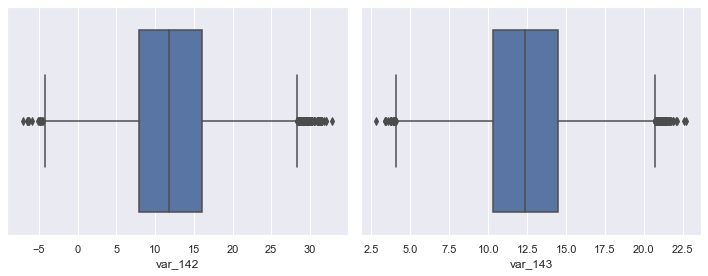

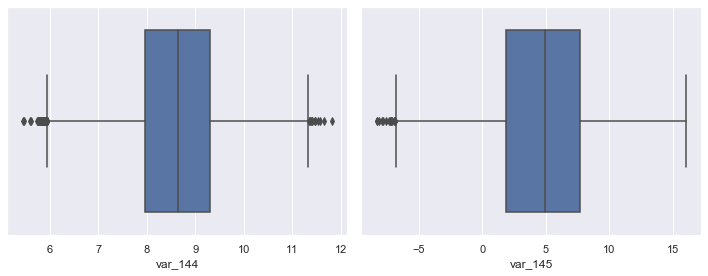

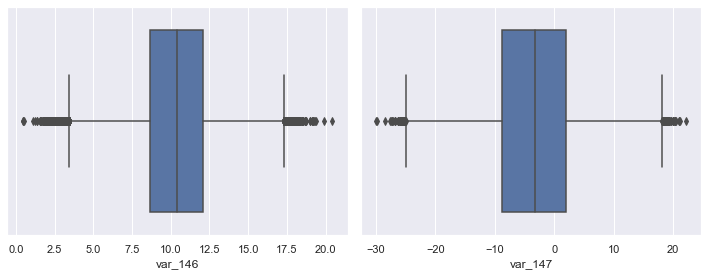

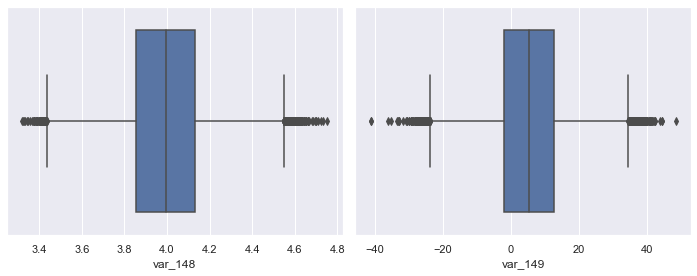

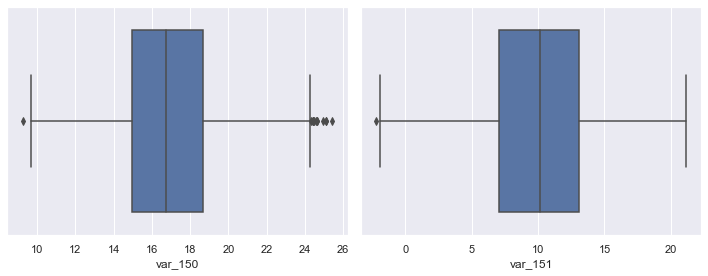

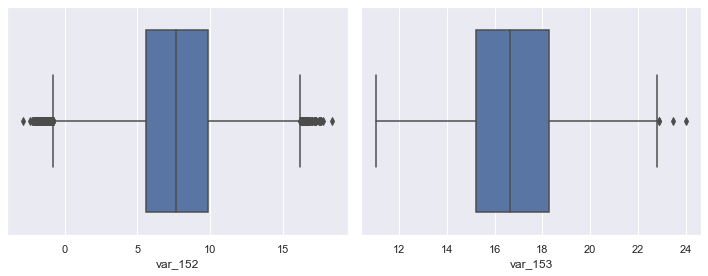

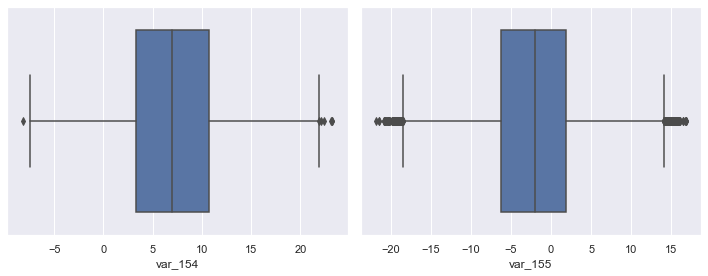

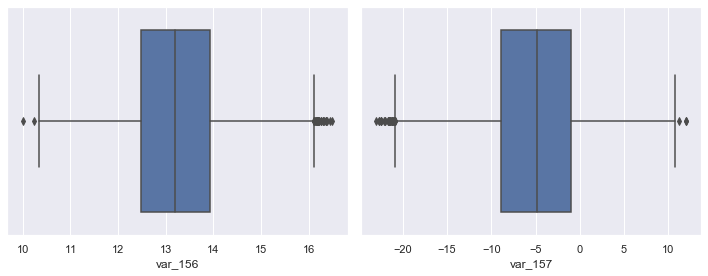

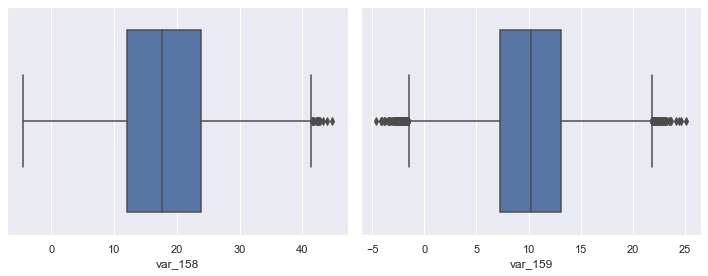

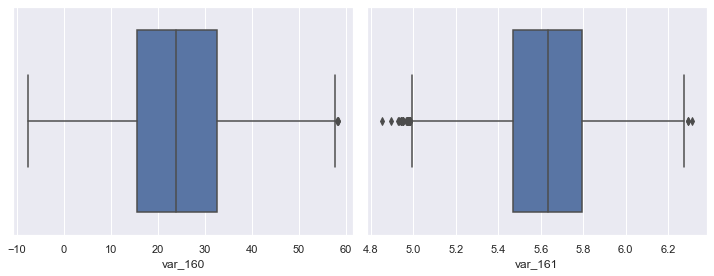

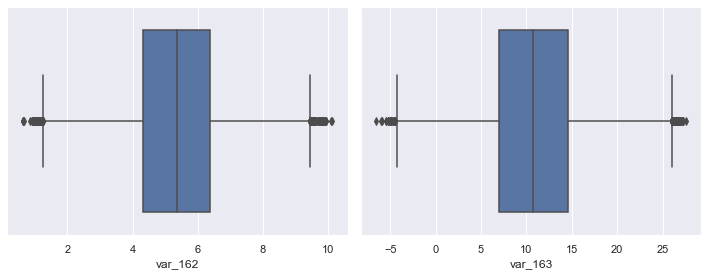

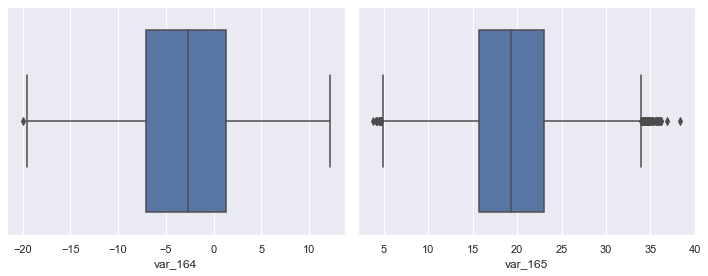

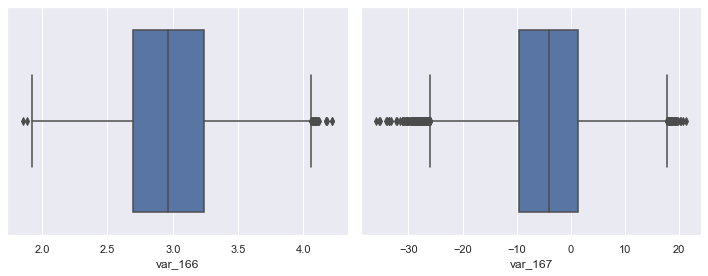

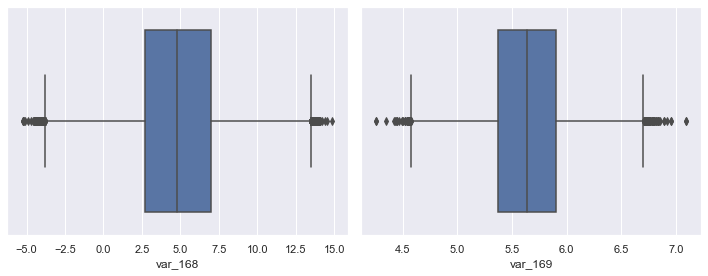

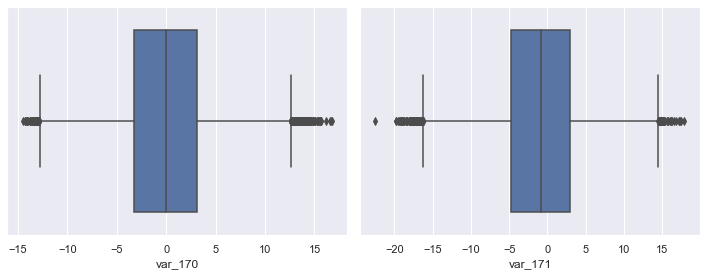

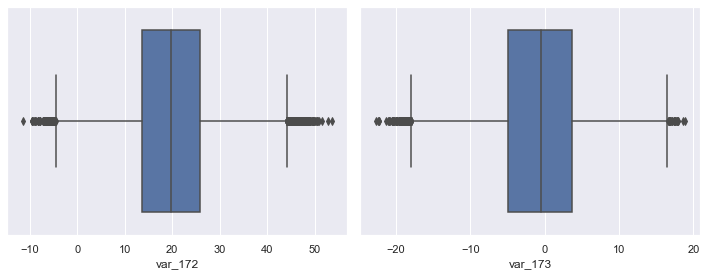

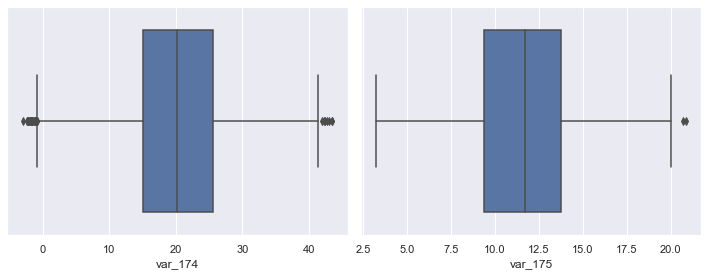

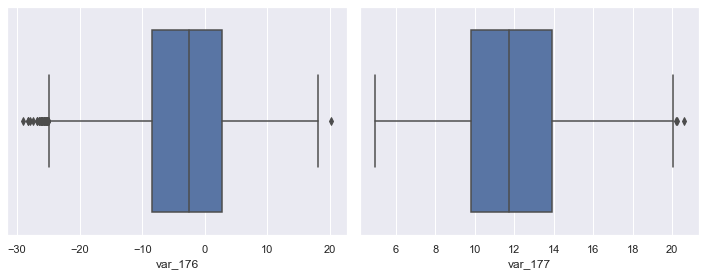

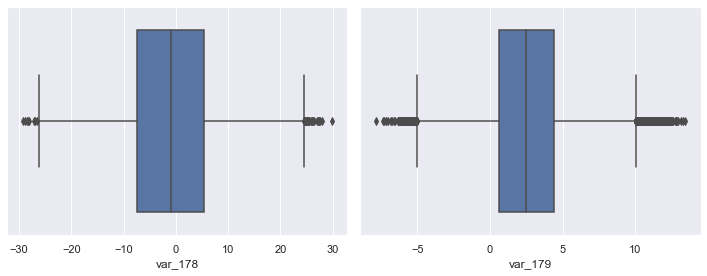

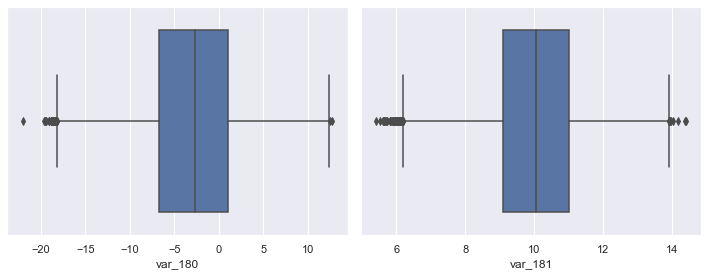

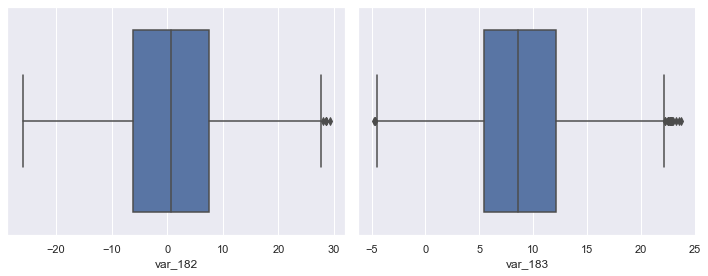

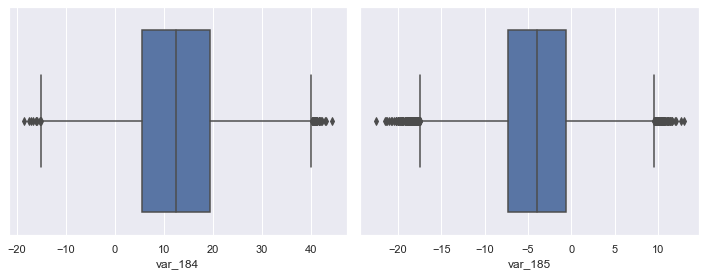

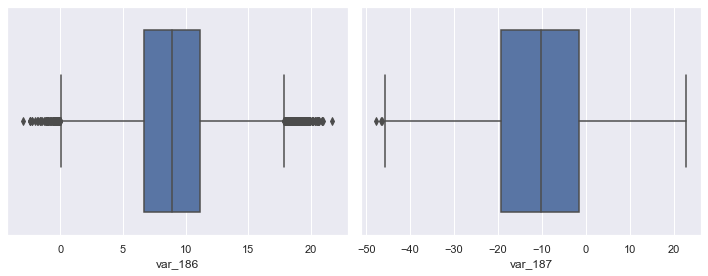

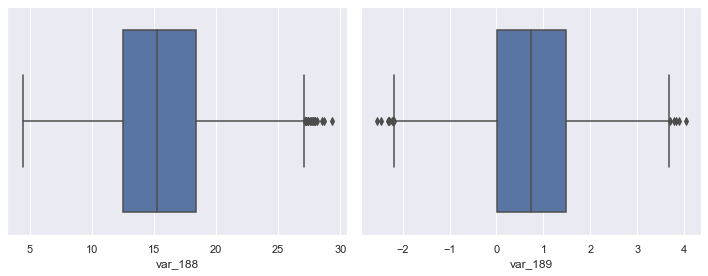

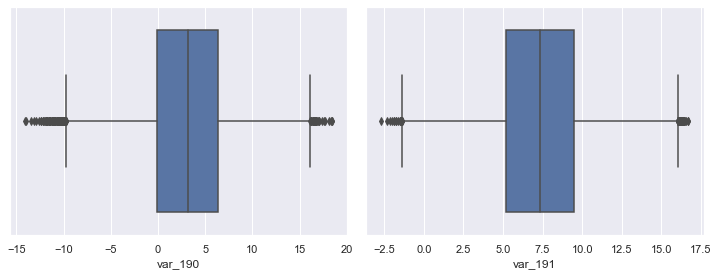

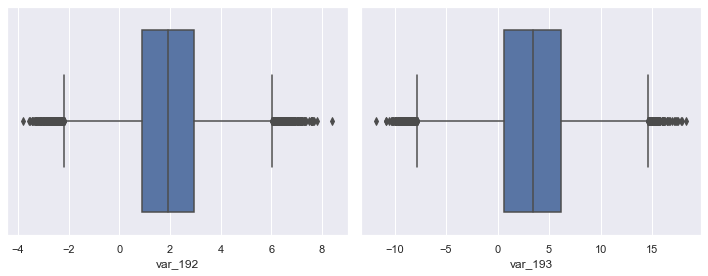

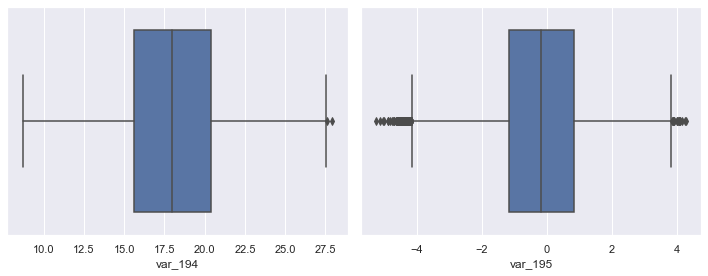

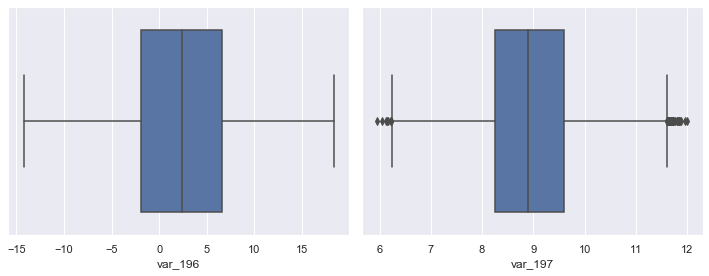

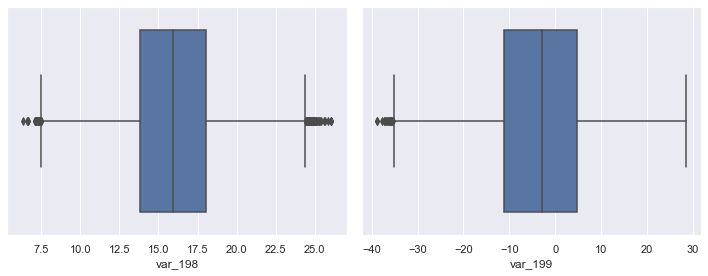

In [19]:
# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            
# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])
            
plot_continuous_columns(df_train)
plot_box_plots(df_train)

- A lot of features are skewed and this is due to the presence of outliers.

## Outlier Analysis

In our data, some of the features have negative values and also the value 0. In such cases, square root transform or logarithmic transformation cannot be used since we cannot take square root of negative values and logarithm of zero is not defined.
Hence for this data we use a method called **Winsorization**. In this method we define a confidence interval of let's say 90% and then replace all the outliers below the 5th percentile with the value at 5th percentile and all the values above 95th percentile with the value at the 95th percentile. It is pretty useful when there are negative values and zeros in the features which cannot be treated with log transforms or square roots.

Let's write a function to that treats all the outliers using Winsorization.

In [20]:
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df_train)

,Feature,Number of Outliers
0,var_0,104
1,var_1,6
2,var_2,49
3,var_3,22
4,var_4,76
...,...,...
195,var_195,132
196,var_196,0
197,var_197,51
198,var_198,94


In [21]:
# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.05],inclusive=(True, True))
    
    return dataframe    


dataframe = treat_outliers(df_train)

# Checking for outliers after applying winsorization
detect_outliers(df_train)

,Feature,Number of Outliers
0,var_0,0
1,var_1,0
2,var_2,0
3,var_3,0
4,var_4,0
...,...,...
195,var_195,0
196,var_196,0
197,var_197,0
198,var_198,0


## CORRELATION ANALYSIS

Let's check for features which might be highly correlated with others in our dataset.

In [22]:
##Correlation analysis
#Correlation plot
df_corr = df_train

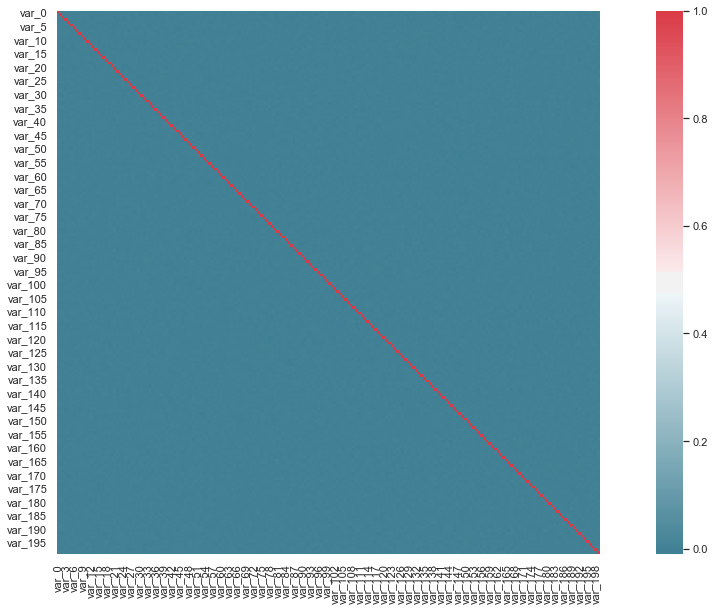

In [23]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(20, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [24]:
corr

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.001048,0.006047,0.003400,0.001392,0.002395,0.006171,0.002258,0.005267,-0.002178,...,0.002632,-0.000620,-0.006183,0.001938,-0.000823,0.001910,0.004449,-0.000315,-0.005864,0.003737
var_1,-0.001048,1.000000,0.003913,-0.000231,0.000709,-0.001188,0.003493,0.001929,0.004043,-0.000410,...,0.005752,0.003674,-0.002430,0.002050,-0.002547,-0.001120,-0.000431,-0.003906,-0.004846,0.002481
var_2,0.006047,0.003913,1.000000,0.000929,0.000326,0.000960,0.000006,-0.001244,0.003003,-0.001330,...,0.000855,0.001984,-0.003466,0.000612,0.002186,-0.001361,0.003692,0.000596,-0.001033,0.003851
var_3,0.003400,-0.000231,0.000929,1.000000,-0.000714,0.003438,-0.000703,0.002397,0.003312,-0.000225,...,0.000508,0.002773,-0.001243,-0.001533,-0.000995,0.001503,-0.002902,0.001772,-0.002112,0.000274
var_4,0.001392,0.000709,0.000326,-0.000714,1.000000,-0.000900,-0.000250,0.004364,0.000805,-0.000882,...,0.001352,0.004474,0.003371,0.000790,0.000300,0.003614,0.000435,-0.000056,-0.001676,-0.001218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.001910,-0.001120,-0.001361,0.001503,0.003614,-0.001694,0.000724,0.001902,0.000634,-0.000866,...,0.004214,0.000917,-0.004377,-0.003761,-0.000794,1.000000,0.002012,-0.003797,0.000146,0.001770
var_196,0.004449,-0.000431,0.003692,-0.002902,0.000435,0.002545,0.005354,0.001114,-0.003640,-0.000205,...,-0.000616,0.002425,-0.001199,-0.005258,-0.005084,0.002012,1.000000,-0.000677,0.000946,0.000729
var_197,-0.000315,-0.003906,0.000596,0.001772,-0.000056,0.000378,-0.003537,0.003419,-0.004278,0.004155,...,-0.004877,0.001193,0.000054,0.005271,0.001295,-0.003797,-0.000677,1.000000,0.001186,0.005840
var_198,-0.005864,-0.004846,-0.001033,-0.002112,-0.001676,-0.001017,-0.002196,0.000585,0.002453,0.003167,...,-0.000281,-0.000628,0.003170,0.001370,0.003092,0.000146,0.000946,0.001186,1.000000,-0.005098


- Very little or no correlation among the independent features, so no need to remove any of them.

## FEATURE SCALING

It's important to bring to a similar scales. So, we will scale the features in a range of 0 to 1.

In [25]:
scaler = MinMaxScaler()

In [26]:
df_train.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,9.7179,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9023,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,2.3439,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.1711,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,5.4785,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [27]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_train))

In [28]:
df_scaled.columns = df_train.columns

In [29]:
df_scaled.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.292736,0.100314,0.606004,0.244521,0.570897,0.337436,0.374943,0.680635,0.023578,0.058610,...,0.567425,0.121026,0.742017,0.388985,0.552343,0.003907,0.826860,0.390441,0.212370,0.588597
1,0.548738,0.301537,0.832627,0.289288,0.739556,0.988597,0.550902,0.493128,0.781053,0.656758,...,0.780127,0.502023,0.628447,1.000000,0.247329,0.934878,0.841101,0.465149,0.772129,0.679133
2,0.261301,0.408409,0.626033,0.667957,0.406597,0.345401,1.000000,0.321256,0.023644,0.111182,...,0.465959,0.711839,0.440780,0.388589,0.856302,1.000000,0.000981,0.292334,0.407323,0.632862
3,0.504976,0.453694,0.262602,0.562529,0.781164,0.634458,0.628702,0.348986,0.000000,0.697664,...,0.569495,0.200030,0.245038,0.368463,0.997406,0.240699,0.207099,0.963409,0.733347,0.353325
4,0.383342,0.504659,0.718287,0.478108,0.723653,0.805346,0.662940,0.736614,1.000000,0.552713,...,0.174357,0.684551,0.066556,0.960135,0.035954,0.189967,0.600215,0.701866,0.736128,0.358953


In [30]:
df_scaled['target'] = target

In [31]:
df_scaled.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0,0.292736,0.100314,0.606004,0.244521,0.570897,0.337436,0.374943,0.680635,0.023578,0.058610,...,0.121026,0.742017,0.388985,0.552343,0.003907,0.826860,0.390441,0.212370,0.588597,0
1,0.548738,0.301537,0.832627,0.289288,0.739556,0.988597,0.550902,0.493128,0.781053,0.656758,...,0.502023,0.628447,1.000000,0.247329,0.934878,0.841101,0.465149,0.772129,0.679133,0
2,0.261301,0.408409,0.626033,0.667957,0.406597,0.345401,1.000000,0.321256,0.023644,0.111182,...,0.711839,0.440780,0.388589,0.856302,1.000000,0.000981,0.292334,0.407323,0.632862,0
3,0.504976,0.453694,0.262602,0.562529,0.781164,0.634458,0.628702,0.348986,0.000000,0.697664,...,0.200030,0.245038,0.368463,0.997406,0.240699,0.207099,0.963409,0.733347,0.353325,0
4,0.383342,0.504659,0.718287,0.478108,0.723653,0.805346,0.662940,0.736614,1.000000,0.552713,...,0.684551,0.066556,0.960135,0.035954,0.189967,0.600215,0.701866,0.736128,0.358953,0


In [32]:
df_preprocessed = df_scaled.copy()

## Model Development

We will be using roc_auc_score to evaluate our models. 

## Fitting Vanilla models

There are many Classification algorithms present in machine learning, which are used for different classification applications. Some of the main classification algorithms are as follows-

- Logistic Regression
- DecisionTree Classifier
- RandomForest Classfier
- XGBClassifier
- GradientBoostingClassifier

The function we have written below takes the features, target and the classification model as the input parameters and internally splits them into training data and validation data. It then fits the classification model on the train data and then makes a prediction on the validation data.It then gives the outputs the `roc_auc_score` and the `roc_curve` for this prediction.


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35903
           1       0.69      0.24      0.35      4097

    accuracy                           0.91     40000
   macro avg       0.80      0.61      0.65     40000
weighted avg       0.90      0.91      0.89     40000

ROC_AUC_SCORE is 0.6117356653855477


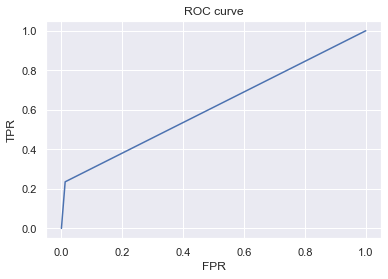

AUC Score = 61.17 %
On Model - 
Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     35903
           1       0.19      0.22      0.20      4097

    accuracy                           0.82     40000
   macro avg       0.55      0.56      0.55     40000
weighted avg       0.84      0.82      0.83     40000

ROC_AUC_SCORE is 0.5552811965737068


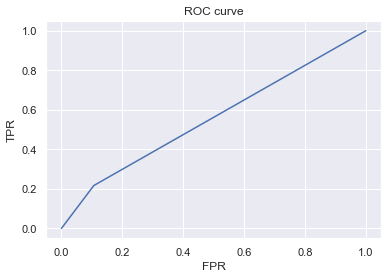

AUC Score = 55.53 %
On Model - 
Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       1.00      0.00      0.00      4097

    accuracy                           0.90     40000
   macro avg       0.95      0.50      0.47     40000
weighted avg       0.91      0.90      0.85     40000

ROC_AUC_SCORE is 0.5001220405174518


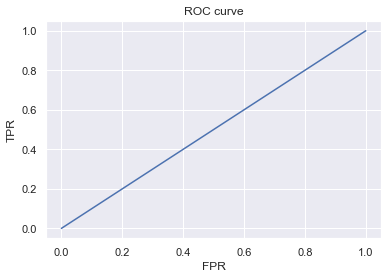

AUC Score = 50.01 %
On Model - 
Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35903
           1       0.69      0.24      0.36      4097

    accuracy                           0.91     40000
   macro avg       0.81      0.61      0.65     40000
weighted avg       0.90      0.91      0.89     40000

ROC_AUC_SCORE is 0.6135974231710533


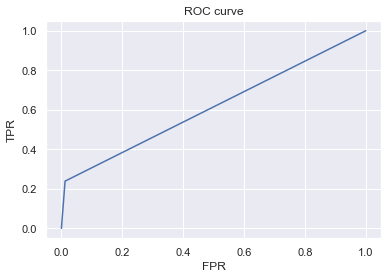

AUC Score = 61.36 %
On Model - 
XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.87      0.03      0.06      4097

    accuracy                           0.90     40000
   macro avg       0.88      0.51      0.50     40000
weighted avg       0.90      0.90      0.86     40000

ROC_AUC_SCORE is 0.5148684223201653


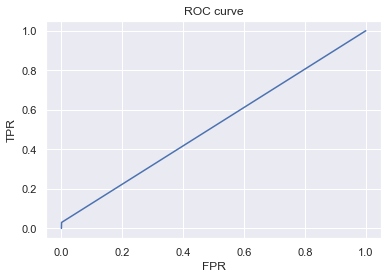

AUC Score = 51.49 %
On Model - 
Gradient Boosting


In [33]:
def run_model(predictors,target, model):
    '''
    Performs model training and tests using ROC-AUC 
    returns AUC score
    '''
    x_train,x_val,y_train,y_val = train_test_split(predictors,target,test_size=0.2,random_state=42)
    model.fit(x_train, y_train)
    y_scores = model.predict(x_val)
    auc = roc_auc_score(y_val, y_scores)
    print('Classification Report:')
    print(classification_report(y_val,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
    print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return auc

# Predictors
X = df_preprocessed.iloc[:,:-1]

# Target
y = df_preprocessed.iloc[:,-1]

# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models = {'Logistic Regression':LogisticRegression,
          'Decision Tree':DecisionTreeClassifier,
          'Random Forest': RandomForestClassifier,
          'XGBoost':XGBClassifier,
          'Gradient Boosting':GradientBoostingClassifier
         }

for i in models.items():
    # run model
    model = i[1]()
    auc = run_model(X, y, model) # train and returns AUC test score
    print('AUC Score = %.2f' %(auc*100) +' %\nOn Model - \n'+str(i[0]))
    print('===='*20)

Observations :

- The best roc_auc_scores are given by Logistic Regression and XGBoost Classifier algorithms.
- We will try to get better results on these two and Random Forest algorithm using Feature Selection and Hyperparameter Tuning techniques.

## Feature Selection 

Now that we have applied vanilla models on our data, we now have a basic understanding of what our predictions look like. Let's now use feature selection methods for identifying the best set of features for each model.

### Feature Selection using Random Forest

Random Forests are often used for feature selection in a data science workflow. This is because the tree based strategies that random forests use, rank the features based on how well they improve the purity of the node. The nodes having a very low impurity get split at the start of the tree while the nodes having a very high impurity get split towards the end of the tree. Hence by pruning the tree after desired amount of splits, we can create a subset of the most important features.

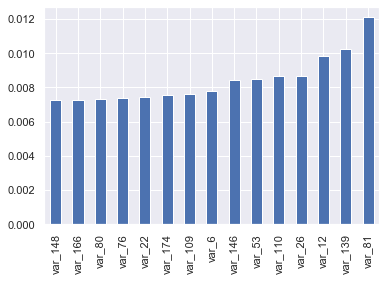

In [34]:
def rfc_feature_selection(dataset,target):
    X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.3, random_state=42, stratify=target)
    rfc = RandomForestClassifier(random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    rfc_importances = pd.Series(rfc.feature_importances_, index=dataset.columns).sort_values().tail(15)
    rfc_importances.plot(kind='bar')
    plt.show()

rfc_feature_selection(X,y)

# Grid-Search & Hyperparameter Tuning 

Hyperparameters are function attributes that we have to specify for an algorithm. We will use : 

- GridSearchCV for Random Forest and Logistic Regression algorithms 
- RandomisedSearchCV for XGBoost Classifier algorithm

to get the best set of hyperparameters.

### Grid Search for Random Forest

In the below task, we write a function that performs hyperparameter tuning for a random forest classifier. We have used the hyperparameters `max_features`, `max_depth` and `criterion` for this task. 

In [35]:
def grid_search_random_forest(dataframe,target):

    x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
    rfc = RandomForestClassifier()
    param_grid = { 
    'max_features': ['auto', 'log2'],
    'max_depth' : [5,6,7],
    'criterion' :['gini', 'entropy']
    }
    grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
    grid_search_model.fit(x_train, y_train)
    print('Best Parameters are:')
    return grid_search_model.best_params_


grid_search_random_forest(X,y)

Best Parameters are:


{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}

### Applying the best parameters obtained using Grid Search on Random Forest model

In the task below, we fit a random forest model using the best parameters obtained using Grid Search. Since the target is imbalanced, we apply Synthetic Minority Oversampling Technique (SMOTE) for undersampling and oversampling the majority and minority classes in the target respectively. 

On Validation data
ROC_AUC_SCORE is 0.5333499285130718
              precision    recall  f1-score   support

           0       0.91      0.64      0.75     53856
           1       0.12      0.43      0.19      6144

    accuracy                           0.62     60000
   macro avg       0.51      0.53      0.47     60000
weighted avg       0.83      0.62      0.69     60000



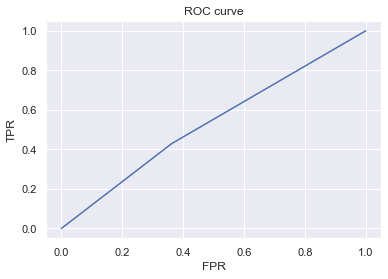

In [36]:
def grid_search_random_forest_best(dataframe,target):
    
    
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE()
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    
    rfc = RandomForestClassifier(n_estimators=11, max_features='auto', max_depth=5, criterion='gini',random_state=42)
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(x_val)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    print('On Validation data')
    print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
    



grid_search_random_forest_best(X,y)

### Applying the grid search function for random forest only on the best features obtained using Random Forest

On Validation data
ROC_AUC_SCORE is 0.5322977883151366
              precision    recall  f1-score   support

           0       0.91      0.49      0.63     53856
           1       0.11      0.58      0.19      6144

    accuracy                           0.49     60000
   macro avg       0.51      0.53      0.41     60000
weighted avg       0.83      0.49      0.59     60000



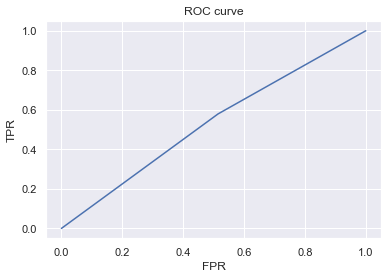

In [37]:
grid_search_random_forest_best(X[['var_81','var_139','var_12','var_26','var_110','var_53','var_146','var_6','var_109','var_174','var_22','var_76','var_80','var_166','var_148']],y)

### Using Grid Search for Logistic Regression

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 88.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 112.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 123.6min finished


Best parameters are :
{'C': 100000000.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag'}
On Validation Data
ROC_AUC_SCORE is  0.7692699919693257
              precision    recall  f1-score   support

           0       0.97      0.78      0.87     53856
           1       0.29      0.75      0.41      6144

    accuracy                           0.78     60000
   macro avg       0.63      0.77      0.64     60000
weighted avg       0.90      0.78      0.82     60000



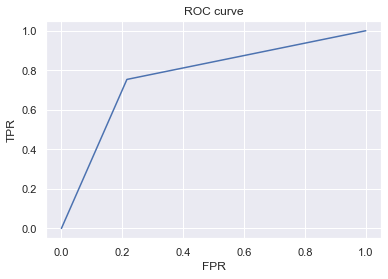

In [38]:
def grid_search_log_reg(dataframe,target):
    
    
    x_train,x_val,y_train,y_val = train_test_split(dataframe, target, test_size=0.3, random_state=42)

    smote = SMOTE()
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    
    log_reg = LogisticRegression()
    
    param_grid ={
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-5, 8, 15),
    'solver' : ['lbfgs','newton-cg','sag','saga'],
    'max_iter' : [100, 1000]
    }
    grid_search = GridSearchCV(log_reg, param_grid=param_grid, cv = 3, verbose=True, n_jobs=-1)
    grid_search.fit(X_sm, y_sm)
    print('Best parameters are :')
    print(grid_search.best_params_)
    y_pred = grid_search.predict(x_val)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    print('On Validation Data')
    print('ROC_AUC_SCORE is ',roc_auc_score(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    

grid_search_log_reg(X,y)

## RandomSearch for XGBoost

In [39]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [40]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20 ] ,
 "max_depth"        : [ 4, 5, 6, 8],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.4, 0.5 , 0.7 ]
    
}

In [41]:
classifier = XGBClassifier()

In [42]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=3,verbose=3)

In [43]:
X = df_preprocessed.iloc[:,:-1]
y = df_preprocessed.iloc[:,-1]


x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42)

In [44]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 26.7min finished



 Time taken: 0 hours 29 minutes and 2.3 seconds.


In [45]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 8,
 'learning_rate': 0.15,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

### Applying XGBoost model

On Validation Data
ROC_AUC_SCORE is  0.5303748363692068
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     53856
           1       0.20      0.11      0.14      6144

    accuracy                           0.87     60000
   macro avg       0.55      0.53      0.53     60000
weighted avg       0.83      0.87      0.85     60000

[[51246  2610]
 [ 5473   671]]


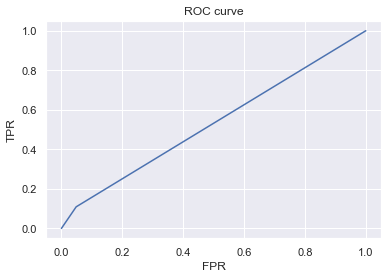

In [47]:
def xgboost(dataframe,target):
    X = dataframe
    y = target

    x_train,x_val,y_train,y_val = train_test_split(X, y, test_size=0.3, random_state=42)

    smote = SMOTE()
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)

    model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
    model.fit(pd.DataFrame(X_sm,columns=x_train.columns), y_sm)
    y_pred = model.predict(x_val)
    
    print('On Validation Data')
    print('ROC_AUC_SCORE is ', roc_auc_score(y_val, y_pred))
    print('Classification Report:')
    print(classification_report(y_val, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    #     print(auc(false_positive_rate, true_positive_rate))
    
    
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    print(confusion_matrix(y_val,y_pred))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
xgboost(X,y)

## Model Selection

Since, Logistic Regression has a better roc_auc_score than both Random Forest and XGBoost algorithms, we select Logistic Regression as our final model.

## Predicting on the Test Dataset

Let's finalize the model and predict on the test dataset.

We will be training our selected model on the entire training dataset.

In [48]:
ID_Code = df_test['ID_code']

In [50]:
#Independent features values of the training dataset will be stored in X
X = df_preprocessed.drop('target',axis=1).values

In [51]:
#Dependent feature values of the training dataset will be stored in y 
y = df_preprocessed['target'].values

In [54]:
smote = SMOTE()
X_sm, y_sm =  smote.fit_sample(X,y)

In [58]:
log_reg_final_model = LogisticRegression(C= 100000000.0, max_iter= 1000, penalty= 'l2', solver= 'sag').fit(X_sm,y_sm)

Now, we will predict the testing data set.

Before passing the independent features, we will scale them as the model has been trained on a scaled data.

In [63]:
df_test.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [ ]:
df_test = df_test.drop('ID_code',axis = 1)

In [64]:
df_test_scaled = pd.DataFrame(scaler.fit_transform(df_test))

In [65]:
df_test_scaled.columns = df_test.columns

In [66]:
df_test_scaled.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.491396,0.934286,0.647868,0.717967,0.563676,0.563885,0.596918,0.555992,0.616146,0.675517,...,0.346499,0.745496,0.168422,0.477313,0.233148,0.780223,0.613081,0.745210,0.445426,0.456290
1,0.376861,0.667159,0.547072,0.395628,0.351853,0.527653,0.624899,0.572118,0.282491,0.255995,...,0.717218,0.587858,0.377335,0.741635,0.333622,0.569846,0.417179,0.606236,0.628698,0.274352
2,0.239172,0.191796,0.475918,0.537077,0.452813,0.834554,0.440118,0.643958,0.585037,0.606615,...,0.387344,0.700735,0.468998,0.467990,0.193832,0.744399,0.228884,0.146114,0.667101,0.241644
3,0.377177,0.561688,0.590920,0.501147,0.318535,0.687271,0.447462,0.657790,0.679433,0.475497,...,0.686848,0.600497,0.440591,0.516235,0.312664,0.854102,0.599396,0.501114,0.322375,0.523223
4,0.520319,0.610381,0.719749,0.590456,0.342955,0.426075,0.762902,0.216621,0.659735,0.429034,...,0.531726,0.605501,0.407583,0.509229,0.547880,0.489135,0.294091,0.183191,0.367939,0.449389


In [67]:
Final_predictions = log_reg_final_model.predict(df_test_scaled)

In [68]:
Predictions_with_ID = pd.DataFrame({"ID_Code":ID_Code,"target" : Final_predictions})

In [74]:
Predictions_with_ID.head(60)

,ID_Code,target
0,test_0,1
1,test_1,1
2,test_2,1
3,test_3,1
4,test_4,1
5,test_5,0
6,test_6,0
7,test_7,1
8,test_8,0
9,test_9,0
